In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from urllib.request import urlopen
import json
from sodapy import Socrata
import plotly.express as px
import plotly.graph_objs as go
import matplotlib.pyplot as plt
from country_list import countries_for_language
import unidecode
import matplotlib.font_manager
matplotlib.font_manager.findSystemFonts(fontpaths=None, fontext='ttf')


plt.style.use('https://raw.githubusercontent.com/datatrooper/instatrooper/master/styles/w2dt.mplstyle')
dp = [
    "#1c1c3c",
    "#967B4F",
    "#46493D",
    "#839DA5",
    "#9FADAD",
    "#2B4144",
    "#986E37"
]
plt.rcParams['axes.grid'] = False
color = "#424630"

In [2]:
def load_colombia_df():
    client = Socrata("www.datos.gov.co", None)  # https://www.datos.gov.co/es/profile/edit/developer_settings   por si no funciona
    results = client.get("gt2j-8ykr", limit=100000)
    results_df = pd.DataFrame.from_records(results)
    return results_df

In [3]:
def load_muestras_df():
    client = Socrata("www.datos.gov.co", None)  # https://www.datos.gov.co/es/profile/edit/developer_settings   por si no funciona
    results = client.get("8835-5baf", limit=100000)
    results_df = pd.DataFrame.from_records(results)
    return results_df

In [4]:
df_boletines = pd.read_csv("junio12.csv")
# df_boletines = df_boletines[df_boletines["Departamento"] == "Antioquia" ]
df_boletines.head()

/home/davinchi/Documents/Projects/instatrooper/venv/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3062: DtypeWarning:

Columns (2,7,12,16,19,20,21,22,23,24,25,26,27,29,30,33,34) have mixed types. Specify dtype option on import or set low_memory=False.



,Caso,Ciudad,Ciudad_municipio,Código País,Código ciudad,Código departamento,Departamento,Edad,Estado,Estado.1,...,Pais de procedencia,Pais_viajo_1,Recuperacion,Sexo,Tipo,Tipo de recuperación,Ubicacion,Ubicación,Unnamed: 1,fecha_boletin
0,3.0,Medellín,NaN,NaN,NaN,NaN,Antioquia,50,NaN,NaN,...,España,NaN,NaN,F,Importado,NaN,NaN,casa,NaN,2020-03-28
1,4.0,Medellín,NaN,NaN,NaN,NaN,Antioquia,55,NaN,NaN,...,Colombia,NaN,NaN,M,Relacionado,NaN,NaN,casa,NaN,2020-03-28
2,5.0,Medellín,NaN,NaN,NaN,NaN,Antioquia,25,NaN,NaN,...,Colombia,NaN,NaN,M,Relacionado,NaN,NaN,casa,NaN,2020-03-28
3,6.0,Itagui,NaN,NaN,NaN,NaN,Antioquia,27,NaN,NaN,...,Colombia,NaN,NaN,F,Relacionado,NaN,NaN,casa,NaN,2020-03-28
4,20.0,Medellín,NaN,NaN,NaN,NaN,Antioquia,26,NaN,NaN,...,Colombia,NaN,NaN,F,Relacionado,NaN,NaN,casa,NaN,2020-03-28


In [5]:
df_col = load_colombia_df()

In [6]:
df_muestras = load_muestras_df()
df_muestras

,fecha,acumuladas,amazonas,antioquia,arauca,atlantico,bogota,bolivar,boyaca,caldas,...,santander,sucre,tolima,valle_del_cauca,vaupes,vichada,procedencia_desconocida,barranquilla,cartagena,santa_marta
0,Acumulado Feb,601,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2020-03-05T00:00:00.000,636,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2020-03-06T00:00:00.000,739,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2020-03-07T00:00:00.000,810,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2020-03-08T00:00:00.000,813,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97,2020-06-09T00:00:00.001,432870,7708,52032,1426,35322,127712,30270,9884,5590,...,12744,3794,6545,38074,791,719,4184,NaN,NaN,NaN
98,2020-06-10T00:00:00.001,444933,7890,54795,1460,10685,129516,2748,10058,5703,...,13045,4029,6920,39071,791,719,5369,25812,27936,9641
99,2020-06-11T00:00:00.001,458324,7960,55998,1475,10990,134280,2867,10186,5914,...,13416,4231,7041,40812,791,719,5422,26943,28833,9690
100,2020-06-12T00:00:00.001,470351,8043,57734,1552,11521,136362,2890,10260,5979,...,14076,4392,7220,42107,791,719,5506,28419,29993,9783


In [7]:
def preprocess_df(df):
    df = df.rename(columns={"fecha_diagnostico": "Fecha de diagnóstico",
                            "ciudad_de_ubicaci_n": "ciudad",
                            "fecha_de_notificaci_n": "Fecha de notificacion",
                            "atenci_n": "atencion"})
    
    df["sexo"] = df["sexo"].str.upper()
    df["estado"] = df["estado"].str.upper()
    df["atencion"] = df["atencion"].str.upper()
    df["tipo"] = df["tipo"].str.upper()
    df["edad"] = df["edad"].astype(int)
    
    df["Fecha de diagnóstico"] = pd.to_datetime(df["Fecha de diagnóstico"], errors="coerce")
    df["fecha_reporte_web"] = pd.to_datetime(df["fecha_reporte_web"], errors="coerce")
    
    df["fecha_recuperado"] = pd.to_datetime(df["fecha_recuperado"], errors="coerce")
    df["fecha_de_muerte"] = pd.to_datetime(df["fecha_de_muerte"], errors="coerce")
    df.loc[df["fis"]=="Asintomático", "estado"] = "ASINTOMATICO"
    df["fis"] = pd.to_datetime(df["fis"], errors="coerce")
    df["tiempo recuperacion"] = df["fecha_recuperado"] - df["fis"]
    df["tiempo recuperacion"] = df["tiempo recuperacion"].dt.days
    
    df["tiempo muerte"] = df["fecha_de_muerte"] - df["fis"]
    df["tiempo muerte"] = df["tiempo muerte"].dt.days
    return df

In [8]:
df_col = preprocess_df(df_col)

In [9]:
df_ant = df_col[df_col["departamento"] == "Antioquia"]

## Generales

In [10]:
max_day = df_ant["fecha_reporte_web"].max()
ultimo_dia = df_ant[df_ant["fecha_reporte_web"] == max_day]
nuevos_inf = ultimo_dia.shape[0]
nuevos_muertos = df_ant[df_ant["fecha_de_muerte"] == "2020-06-13"].shape[0]
nuevos_recuperados = df_ant[df_ant["fecha_recuperado"] == "2020-06-13"].shape[0]

infectados_totales = df_ant.shape[0]

recuperados_totales = df_ant["atencion"].value_counts()["RECUPERADO"]
fallecidos_totales = df_ant["atencion"].value_counts()["FALLECIDO"]
uci = df_ant["atencion"].value_counts()["HOSPITAL UCI"]
hospital = df_ant["atencion"].value_counts()["HOSPITAL"]
activos_totales = df_ant[df_ant["atencion"].isin(["CASA", "HOSPITAL", "HOSPITAL UCI"])].shape[0]

print(f"""
nuevos infectados: {nuevos_inf}
nuevos muertos: {nuevos_muertos}
nuevos recuperados: {nuevos_recuperados}
infectados totales: {infectados_totales}
recuperados totales: {recuperados_totales}
fallecidos totales: {fallecidos_totales}
uci: {uci}
hospital: {hospital}
activos totales: {activos_totales}
""")


nuevos infectados: 102
nuevos muertos: 0
nuevos recuperados: 2
infectados totales: 1884
recuperados totales: 765
fallecidos totales: 8
uci: 9
hospital: 41
activos totales: 1109



In [11]:
last_date = df_boletines["fecha_boletin"].max()
df_boletines[df_boletines["fecha_boletin"] == last_date]

,Caso,Ciudad,Ciudad_municipio,Código País,Código ciudad,Código departamento,Departamento,Edad,Estado,Estado.1,...,Pais de procedencia,Pais_viajo_1,Recuperacion,Sexo,Tipo,Tipo de recuperación,Ubicacion,Ubicación,Unnamed: 1,fecha_boletin
43456,3.0,Medellín,NaN,NaN,5001.0,5.0,Antioquia,50,Leve,NaN,...,España,724.0,PCR,F,NaN,NaN,NaN,Recuperado,NaN,2020-06-12
43457,4.0,Medellín,NaN,NaN,5001.0,5.0,Antioquia,55,Leve,NaN,...,NaN,NaN,PCR,M,NaN,NaN,NaN,Recuperado,NaN,2020-06-12
43458,5.0,Medellín,NaN,NaN,5001.0,5.0,Antioquia,25,Leve,NaN,...,NaN,NaN,PCR,M,NaN,NaN,NaN,Recuperado,NaN,2020-06-12
43459,6.0,Itagüí,NaN,NaN,5360.0,5.0,Antioquia,27,Leve,NaN,...,NaN,NaN,PCR,F,NaN,NaN,NaN,Recuperado,NaN,2020-06-12
43460,20.0,Medellín,NaN,NaN,5001.0,5.0,Antioquia,26,Leve,NaN,...,NaN,NaN,PCR,F,NaN,NaN,NaN,Recuperado,NaN,2020-06-12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45233,46149.0,Medellín,NaN,NaN,5001.0,5.0,Antioquia,26,Leve,NaN,...,NaN,NaN,NaN,M,NaN,NaN,NaN,Casa,NaN,2020-06-12
45234,46155.0,Medellín,NaN,NaN,5001.0,5.0,Antioquia,3,Leve,NaN,...,NaN,NaN,NaN,M,NaN,NaN,NaN,Casa,NaN,2020-06-12
45235,46157.0,Medellín,NaN,NaN,5001.0,5.0,Antioquia,21,Leve,NaN,...,NaN,NaN,NaN,F,NaN,NaN,NaN,Casa,NaN,2020-06-12
45236,46227.0,Medellín,NaN,NaN,5001.0,5.0,Antioquia,55,Leve,NaN,...,NaN,NaN,NaN,F,NaN,NaN,NaN,Casa,NaN,2020-06-12


## Infectados

In [12]:
cuenta = pd.DataFrame(df_ant.groupby("Fecha de diagnóstico")["id_de_caso"].count()).reset_index()
cuenta = cuenta.rename(columns={"id_de_caso":"cuenta"})
idx = pd.date_range(cuenta["Fecha de diagnóstico"].min(), cuenta["Fecha de diagnóstico"].max())
all_dates = pd.DataFrame(idx, columns=["fecha"])
cuenta = all_dates.merge(cuenta, left_on="fecha", 
                right_on="Fecha de diagnóstico", 
                how="left").drop("Fecha de diagnóstico", axis=1).fillna(0)
cuenta["fecha"] = cuenta["fecha"].dt.strftime('%m-%d')

In [13]:
cuenta["cuenta"].sum()

1876.0

In [14]:
cuenta[cuenta["fecha"] == "05-11"].index[0]

63

In [15]:
cuenta

,fecha,cuenta
0,03-09,1.0
1,03-10,0.0
2,03-11,3.0
3,03-12,0.0
4,03-13,0.0
...,...,...
92,06-09,74.0
93,06-10,56.0
94,06-11,50.0
95,06-12,59.0


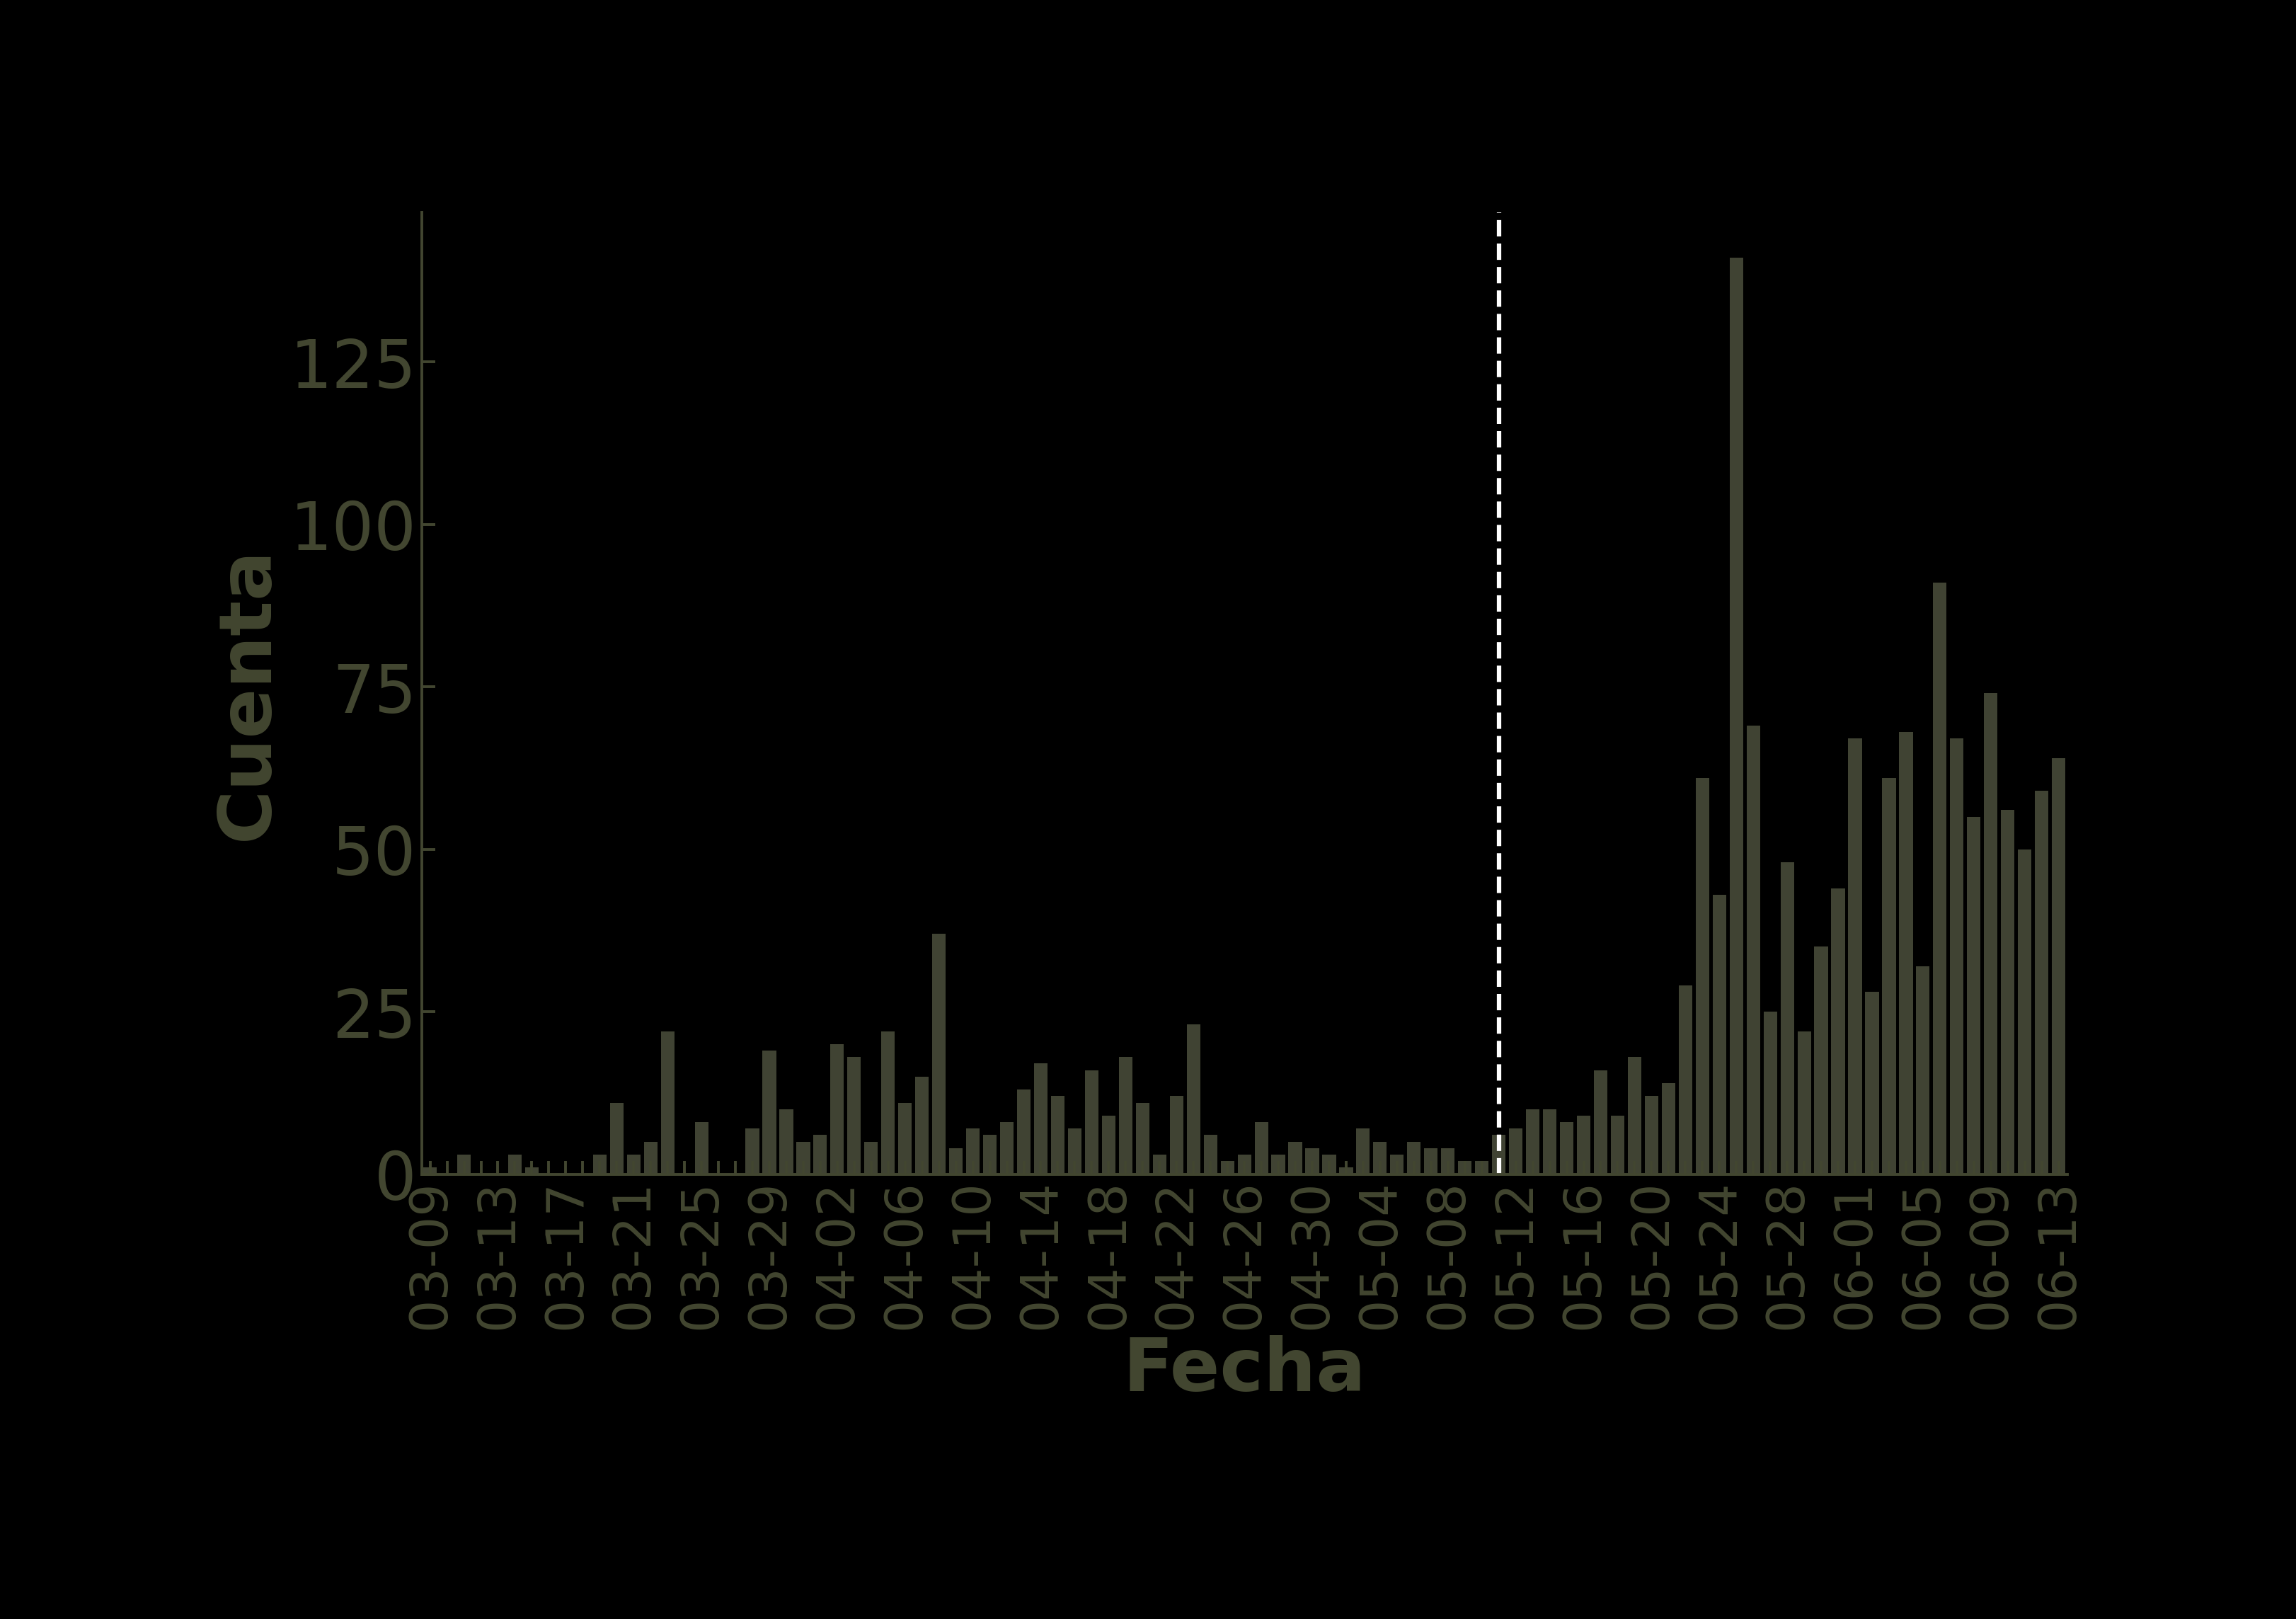

In [16]:
plt.rcParams['axes.labelweight'] = 'bold'
cuenta_plot = cuenta.reset_index(drop=True)
sns.set_context("talk")
plt.figure(figsize=(20,12))
ax = sns.barplot(x="fecha", y="cuenta", data=cuenta_plot, color=color)


ax.tick_params(axis='x',which = "major", colors=color, labelsize=35, labelrotation=90)
ax.tick_params(axis='y', colors=color, labelsize=45)

plt.setp(ax.spines.values(), color=color)

plt.axvline(cuenta_plot[cuenta_plot["fecha"] == "05-11"].index[0], color="white", linestyle='--', linewidth=3)

ax.set_xlabel("Fecha", fontsize=50, color=color)
ax.set_ylabel("Cuenta", fontsize=50, color=color)

for i,label in enumerate(ax.get_xticklabels()):
    if i%4 == 0:
        pass
    else:
        label.set_visible(False)



plt.savefig(f'confirmados_dia.png',bbox_inches='tight', transparent="True", pad_inches = 0)
plt.show()

## Infectados por web

In [17]:
cuenta = pd.DataFrame(df_ant.groupby("fecha_reporte_web")["id_de_caso"].count()).reset_index()
cuenta = cuenta.rename(columns={"id_de_caso":"cuenta"})
idx = pd.date_range(cuenta["fecha_reporte_web"].min(), cuenta["fecha_reporte_web"].max())
all_dates = pd.DataFrame(idx, columns=["fecha"])
cuenta = all_dates.merge(cuenta, left_on="fecha", 
                right_on="fecha_reporte_web", 
                how="left").drop("fecha_reporte_web", axis=1).fillna(0)
cuenta["fecha"] = cuenta["fecha"].dt.strftime('%m-%d')

In [18]:
cuenta["cuenta"].sum()

1884.0

In [19]:
cuenta[cuenta["fecha"] == "05-11"].index[0]

63

In [20]:
cuenta

,fecha,cuenta
0,03-09,1.0
1,03-10,0.0
2,03-11,3.0
3,03-12,0.0
4,03-13,0.0
...,...,...
92,06-09,74.0
93,06-10,56.0
94,06-11,27.0
95,06-12,52.0


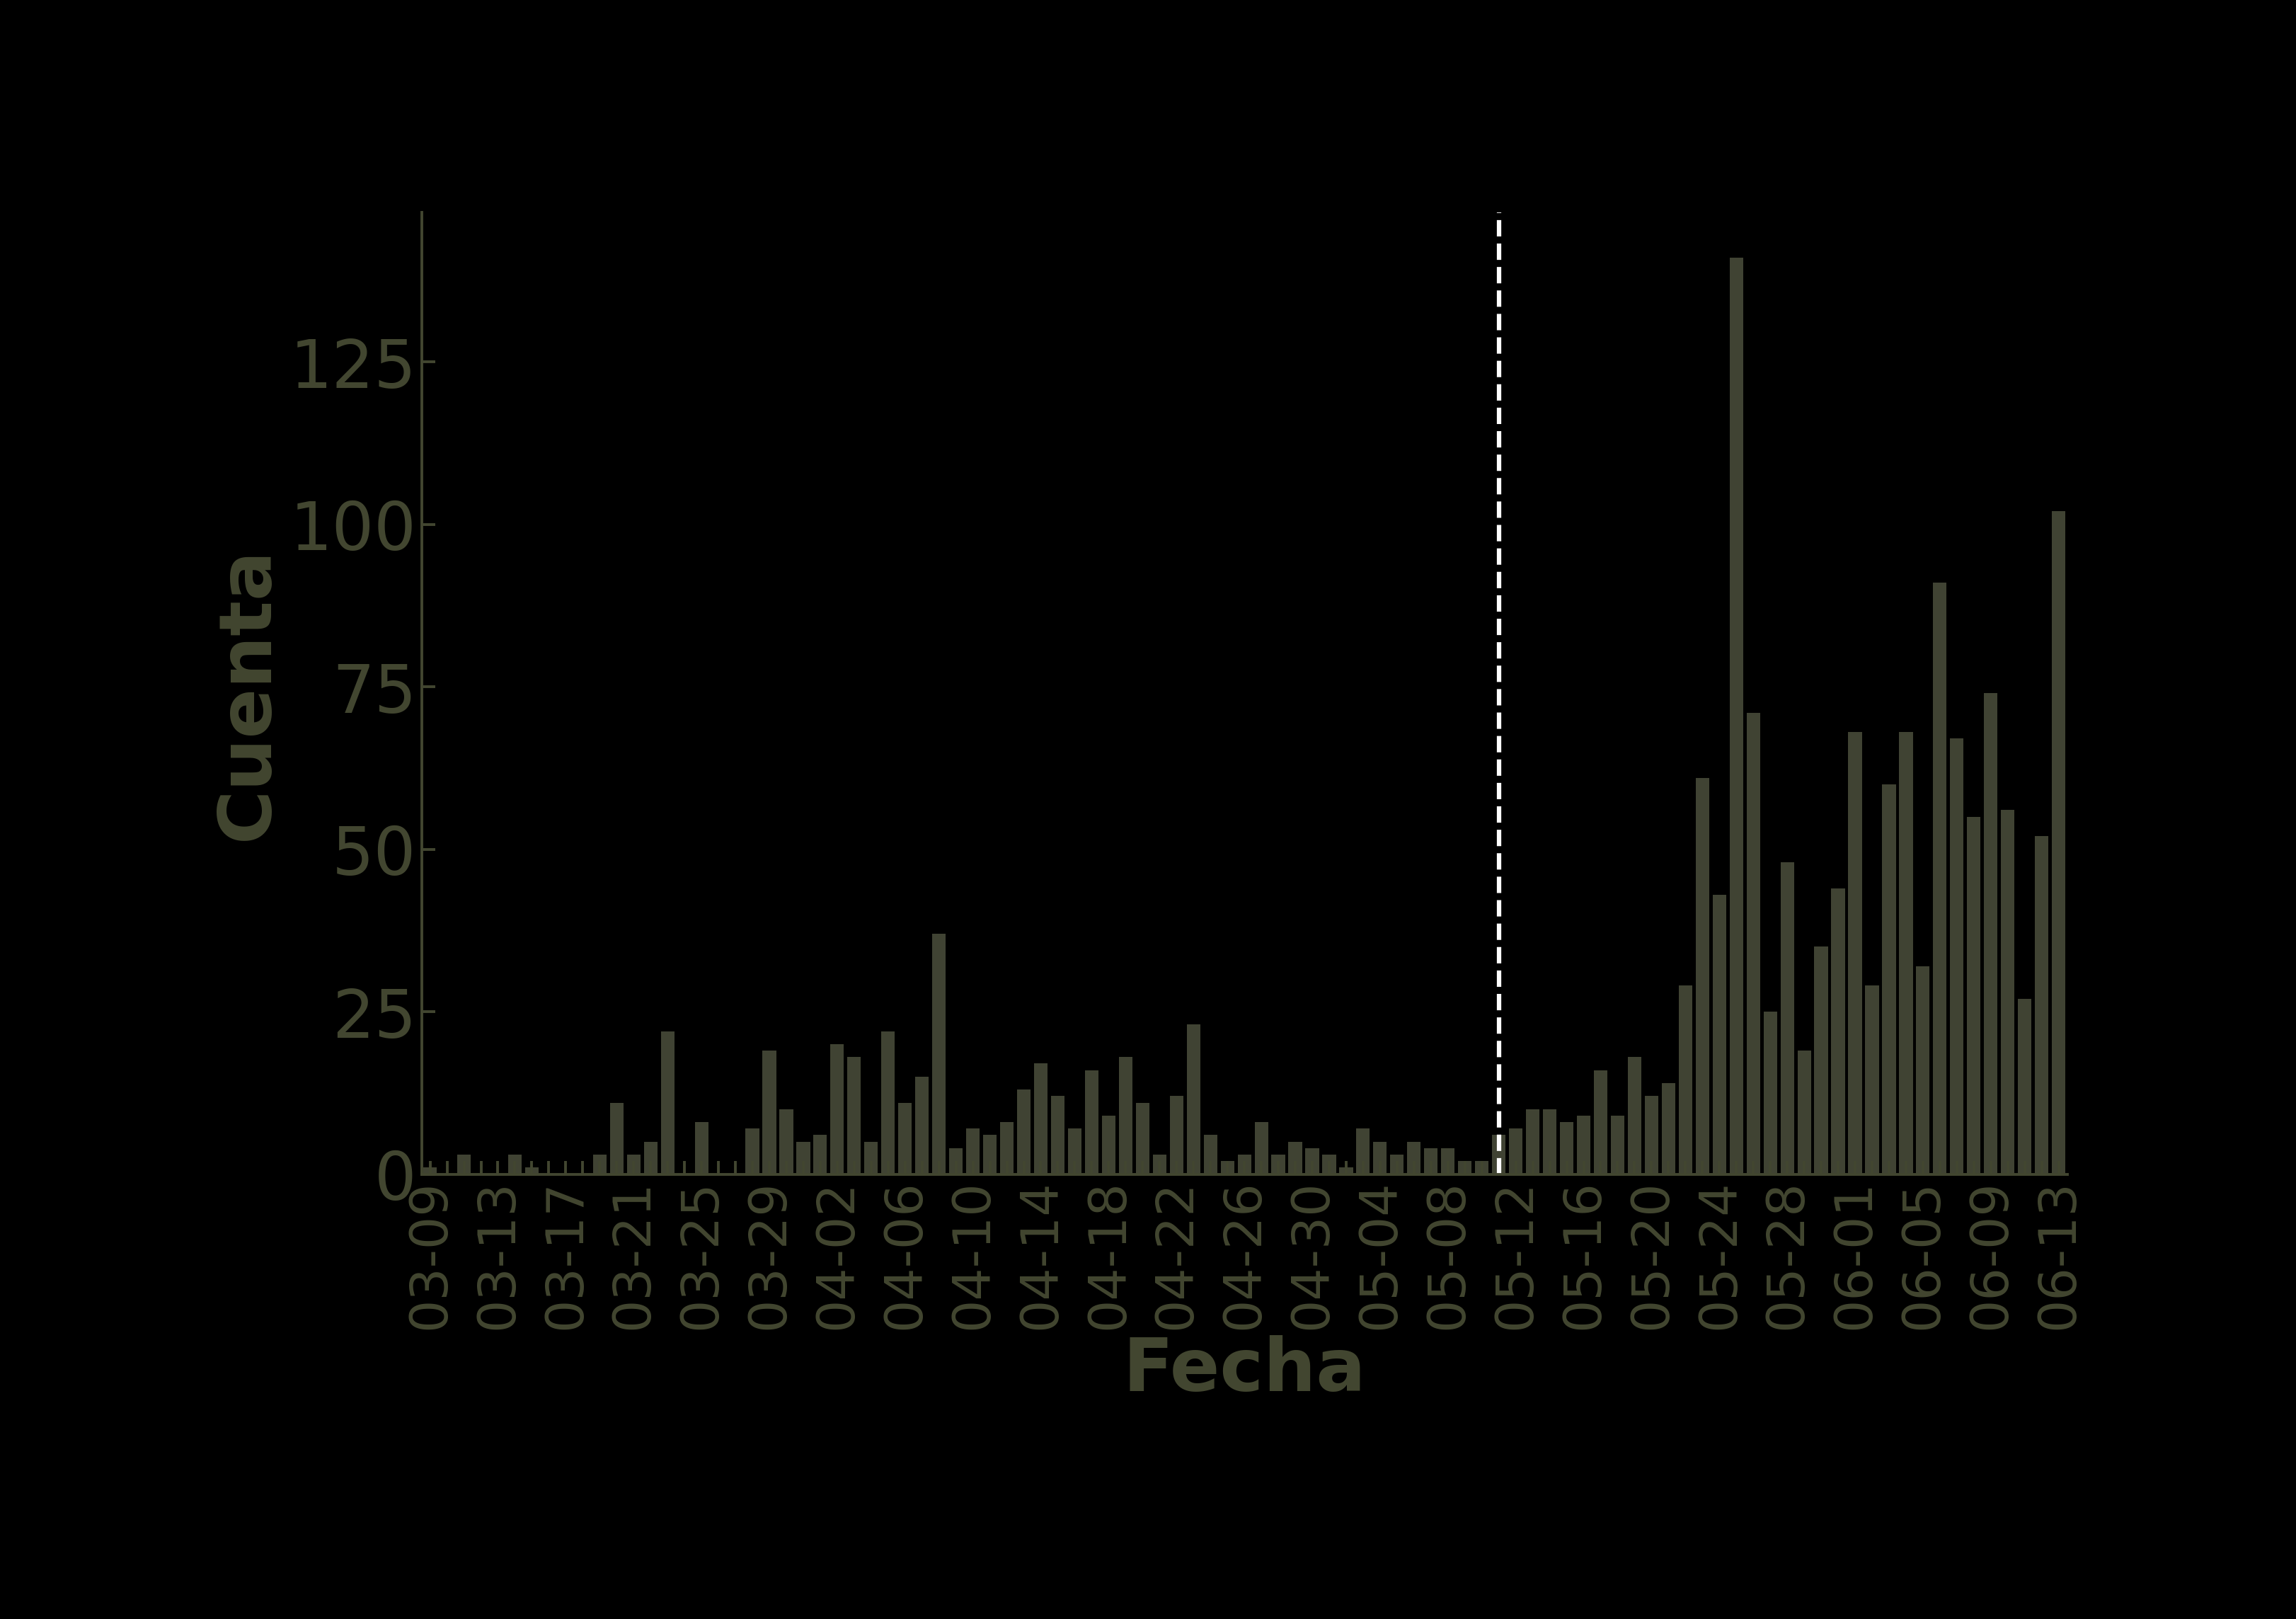

In [21]:
plt.rcParams['axes.labelweight'] = 'bold'
cuenta_plot = cuenta.reset_index(drop=True)
sns.set_context("talk")
plt.figure(figsize=(20,12))
ax = sns.barplot(x="fecha", y="cuenta", data=cuenta_plot, color=color)


ax.tick_params(axis='x',which = "major", colors=color, labelsize=35, labelrotation=90)
ax.tick_params(axis='y', colors=color, labelsize=45)

plt.setp(ax.spines.values(), color=color)

plt.axvline(cuenta_plot[cuenta_plot["fecha"] == "05-11"].index[0], color="white", linestyle='--', linewidth=3)

ax.set_xlabel("Fecha", fontsize=50, color=color)
ax.set_ylabel("Cuenta", fontsize=50, color=color)

for i,label in enumerate(ax.get_xticklabels()):
    if i%4 == 0:
        pass
    else:
        label.set_visible(False)

plt.show()

## Activos

In [22]:
df_boletines

,Caso,Ciudad,Ciudad_municipio,Código País,Código ciudad,Código departamento,Departamento,Edad,Estado,Estado.1,...,Pais de procedencia,Pais_viajo_1,Recuperacion,Sexo,Tipo,Tipo de recuperación,Ubicacion,Ubicación,Unnamed: 1,fecha_boletin
0,3.0,Medellín,NaN,NaN,NaN,NaN,Antioquia,50,NaN,NaN,...,España,NaN,NaN,F,Importado,NaN,NaN,casa,NaN,2020-03-28
1,4.0,Medellín,NaN,NaN,NaN,NaN,Antioquia,55,NaN,NaN,...,Colombia,NaN,NaN,M,Relacionado,NaN,NaN,casa,NaN,2020-03-28
2,5.0,Medellín,NaN,NaN,NaN,NaN,Antioquia,25,NaN,NaN,...,Colombia,NaN,NaN,M,Relacionado,NaN,NaN,casa,NaN,2020-03-28
3,6.0,Itagui,NaN,NaN,NaN,NaN,Antioquia,27,NaN,NaN,...,Colombia,NaN,NaN,F,Relacionado,NaN,NaN,casa,NaN,2020-03-28
4,20.0,Medellín,NaN,NaN,NaN,NaN,Antioquia,26,NaN,NaN,...,Colombia,NaN,NaN,F,Relacionado,NaN,NaN,casa,NaN,2020-03-28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45233,46149.0,Medellín,NaN,NaN,5001.0,5.0,Antioquia,26,Leve,NaN,...,NaN,NaN,NaN,M,NaN,NaN,NaN,Casa,NaN,2020-06-12
45234,46155.0,Medellín,NaN,NaN,5001.0,5.0,Antioquia,3,Leve,NaN,...,NaN,NaN,NaN,M,NaN,NaN,NaN,Casa,NaN,2020-06-12
45235,46157.0,Medellín,NaN,NaN,5001.0,5.0,Antioquia,21,Leve,NaN,...,NaN,NaN,NaN,F,NaN,NaN,NaN,Casa,NaN,2020-06-12
45236,46227.0,Medellín,NaN,NaN,5001.0,5.0,Antioquia,55,Leve,NaN,...,NaN,NaN,NaN,F,NaN,NaN,NaN,Casa,NaN,2020-06-12


In [23]:
df_boletines["Ubicación"].value_counts().index

Index(['Casa', 'Recuperado', 'Hospital', 'Fallecido', 'Hospital UCI ',
       'En casa', 'Hospital UCI', 'casa', 'Casa  ', 'hospital UCI',
       'Recuperado (Hospital)', 'hospital'],
      dtype='object')

In [24]:
activos = ['casa', 'hospital UCI', 'hospital', 'En casa',
       'Hospital UCI', 'Hospital', 'Casa',
       'Casa  ', 'Hospital UCI ']
df_activos = df_boletines[df_boletines["Ubicación"].isin(activos)]
df_activos.head()

,Caso,Ciudad,Ciudad_municipio,Código País,Código ciudad,Código departamento,Departamento,Edad,Estado,Estado.1,...,Pais de procedencia,Pais_viajo_1,Recuperacion,Sexo,Tipo,Tipo de recuperación,Ubicacion,Ubicación,Unnamed: 1,fecha_boletin
0,3.0,Medellín,NaN,NaN,NaN,NaN,Antioquia,50,NaN,NaN,...,España,NaN,NaN,F,Importado,NaN,NaN,casa,NaN,2020-03-28
1,4.0,Medellín,NaN,NaN,NaN,NaN,Antioquia,55,NaN,NaN,...,Colombia,NaN,NaN,M,Relacionado,NaN,NaN,casa,NaN,2020-03-28
2,5.0,Medellín,NaN,NaN,NaN,NaN,Antioquia,25,NaN,NaN,...,Colombia,NaN,NaN,M,Relacionado,NaN,NaN,casa,NaN,2020-03-28
3,6.0,Itagui,NaN,NaN,NaN,NaN,Antioquia,27,NaN,NaN,...,Colombia,NaN,NaN,F,Relacionado,NaN,NaN,casa,NaN,2020-03-28
4,20.0,Medellín,NaN,NaN,NaN,NaN,Antioquia,26,NaN,NaN,...,Colombia,NaN,NaN,F,Relacionado,NaN,NaN,casa,NaN,2020-03-28


In [25]:
cuenta = df_activos.groupby("fecha_boletin").size().to_frame("cuenta").reset_index()
cuenta["fecha_boletin"] = pd.to_datetime(cuenta["fecha_boletin"])
cuenta["fecha_boletin"] = cuenta["fecha_boletin"].dt.strftime('%m-%d')
cuenta.tail()



,fecha_boletin,cuenta
66,06-08,975
67,06-09,1047
68,06-10,1084
69,06-11,1062
70,06-12,1069


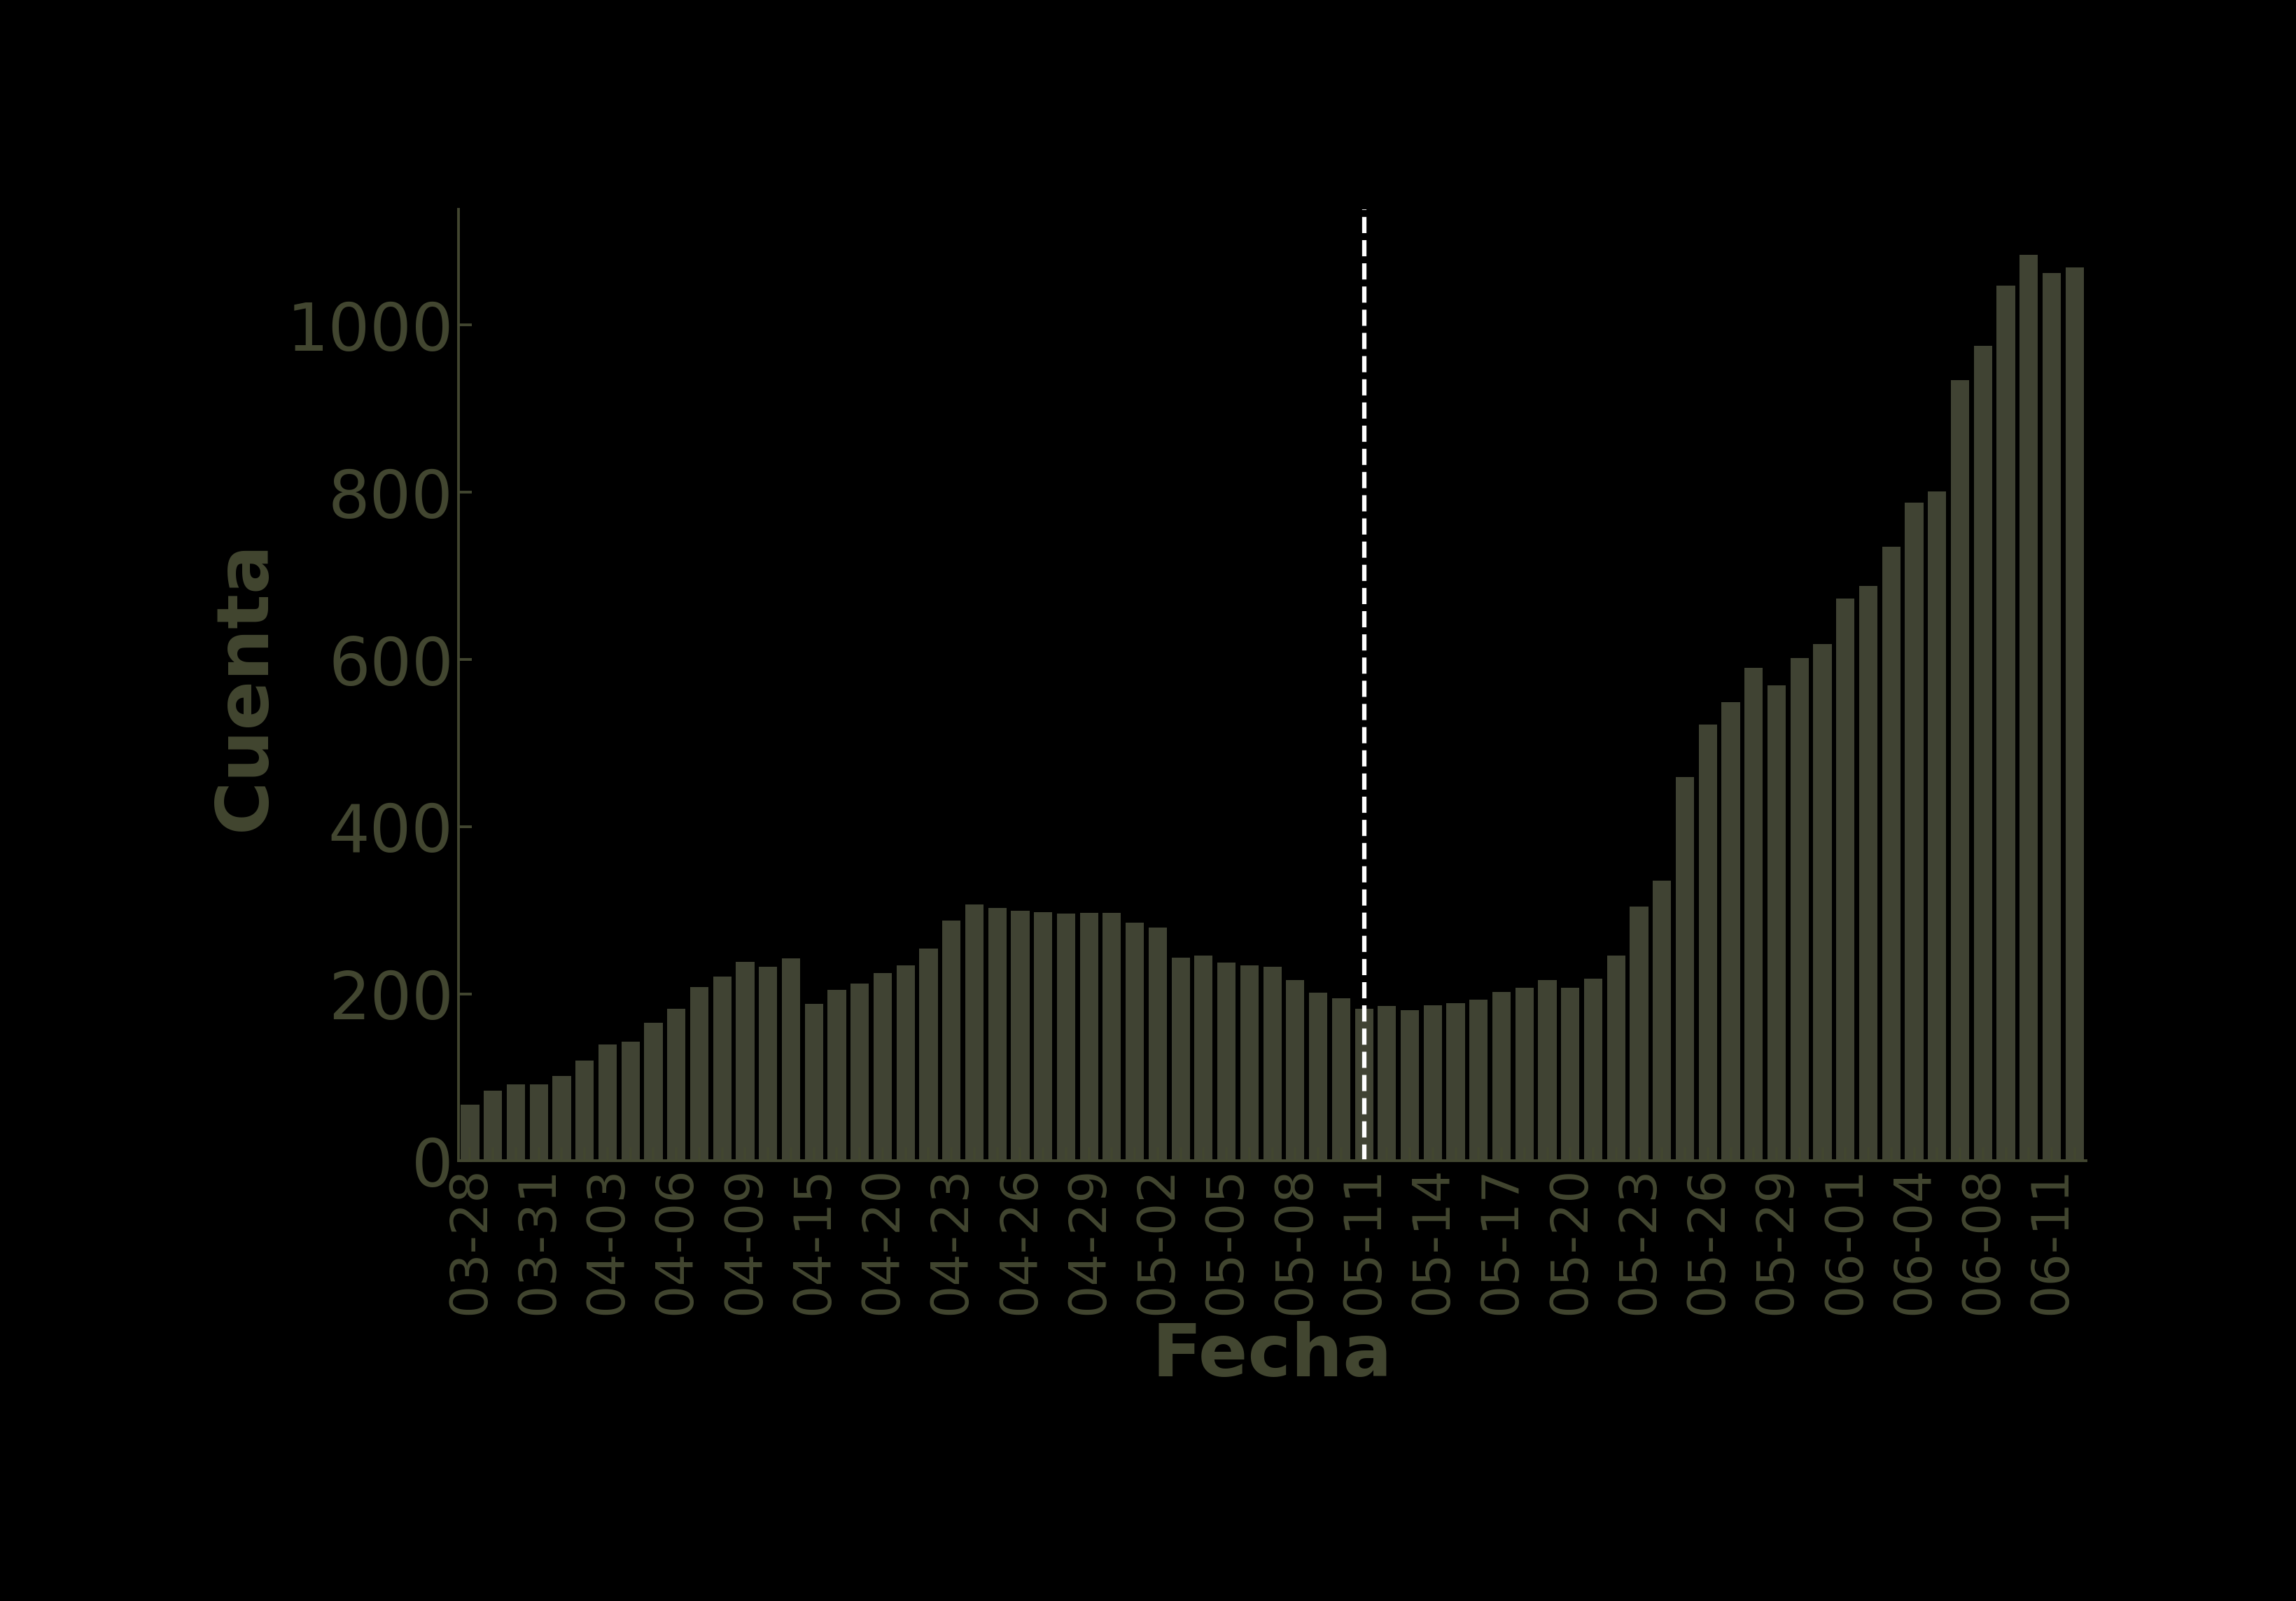

In [26]:
sns.set_context("talk")
plt.figure(figsize=(20,12))
ax = sns.barplot(x="fecha_boletin", y="cuenta", data=cuenta, color=color)
plt.xticks(rotation=90, fontsize=25)
plt.yticks(fontsize=25)

plt.axvline(cuenta[cuenta["fecha_boletin"] == "05-11"].index[0], color="white", linestyle='--', linewidth=3)

ax.tick_params(axis='x',which = "major", colors=color, labelsize=35, labelrotation=90)
ax.tick_params(axis='y', colors=color, labelsize=45)

ax.set_xlabel("Fecha", fontsize=50, color=color)
ax.set_ylabel("Cuenta", fontsize=50, color=color)
plt.setp(ax.spines.values(), color=color)


for i,label in enumerate(ax.get_xticklabels()):
    if i%3 == 0:
        pass
    else:
        label.set_visible(False)
plt.savefig(f'activos_dia.png',bbox_inches='tight', transparent="True", pad_inches = 0)
plt.show()

## Numero de pruebas 

### Antioquia

In [27]:
df_muestras_ant = df_muestras.loc[:,["fecha", "antioquia"]]
df_muestras_ant = df_muestras_ant[df_muestras_ant["antioquia"].notnull()]
df_muestras_ant["fecha"] = pd.to_datetime(df_muestras_ant["fecha"])
df_muestras_ant["fecha"] = df_muestras_ant["fecha"].dt.strftime('%m-%d')
df_muestras_ant["antioquia"] = df_muestras_ant["antioquia"].astype(int)
df_muestras_ant["cuenta"] = df_muestras_ant["antioquia"].diff()
df_muestras_ant

,fecha,antioquia,cuenta
67,05-10,21161,NaN
68,05-11,21676,515.0
69,05-12,22573,897.0
70,05-13,23234,661.0
71,05-14,23733,499.0
72,05-15,24478,745.0
73,05-16,25322,844.0
74,05-17,26154,832.0
75,05-18,26483,329.0
76,05-19,27349,866.0


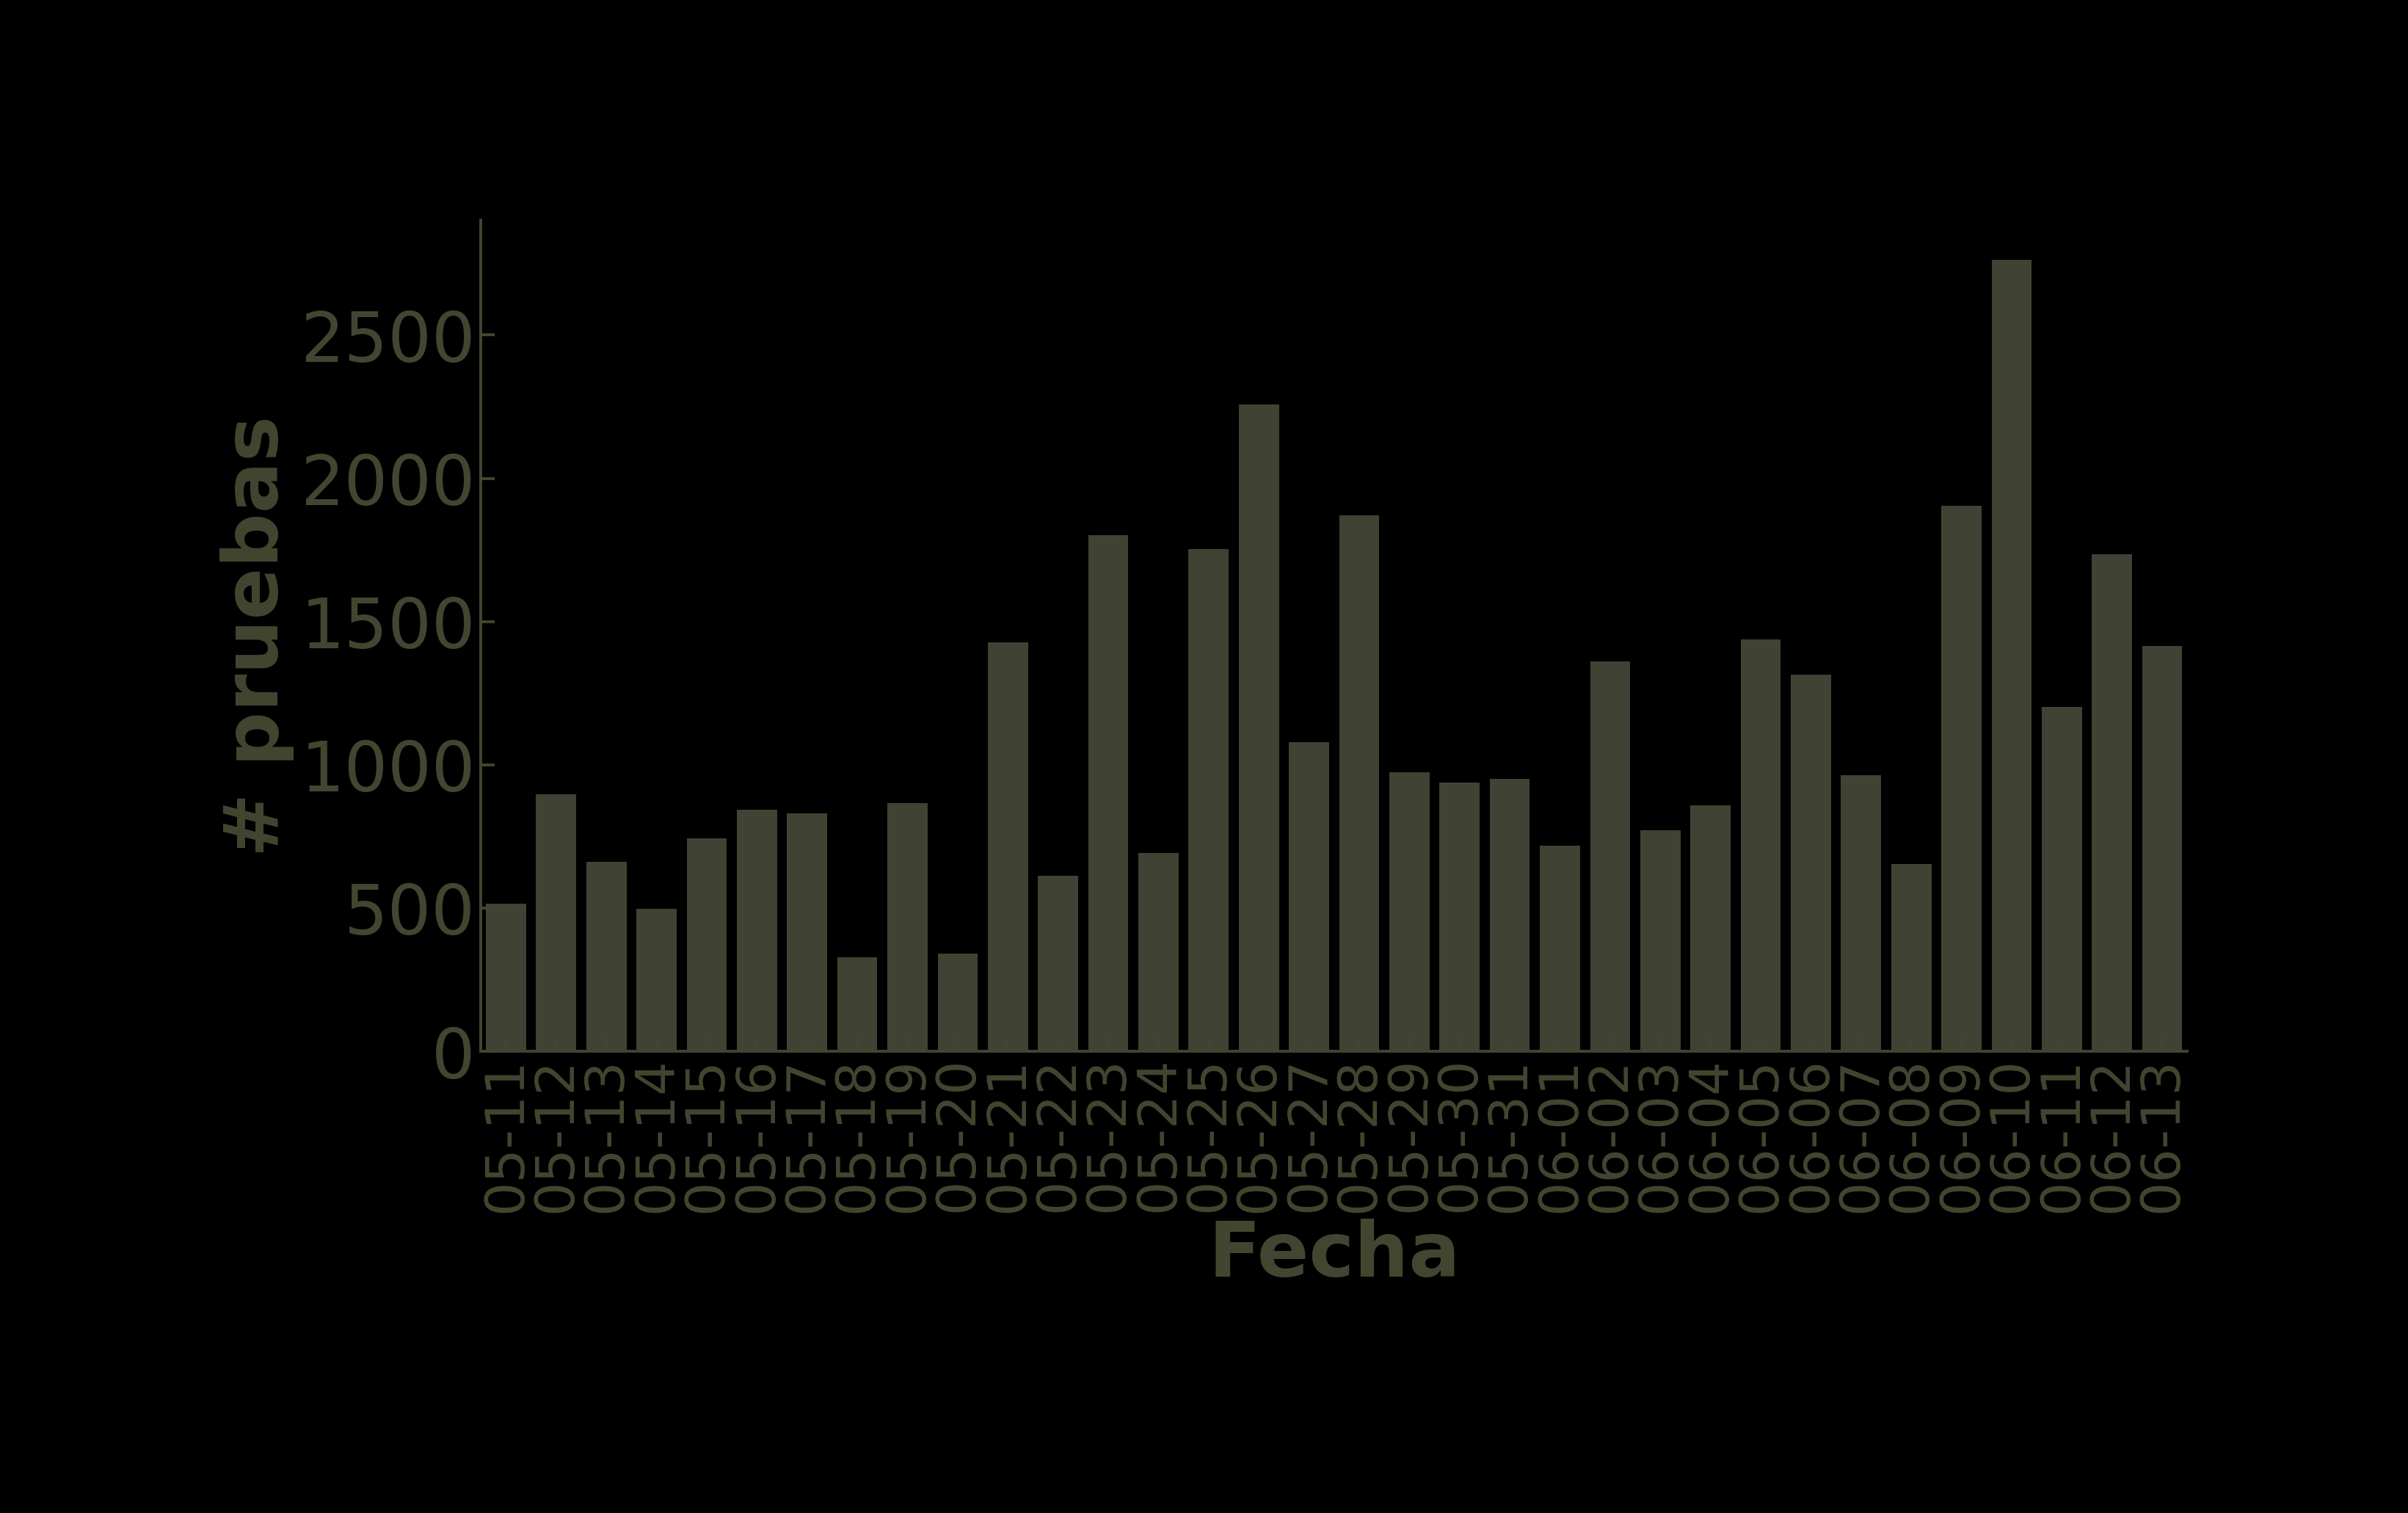

In [28]:
plt.figure(figsize=(20,10))
ax = sns.barplot(x="fecha", y="cuenta", data=df_muestras_ant[1:], color=color)
plt.xticks(rotation=90, fontsize=25)
plt.yticks(fontsize=25)

ax.tick_params(axis='x',which = "major", colors=color, labelsize=35, labelrotation=90)
ax.tick_params(axis='y', colors=color, labelsize=45)

ax.set_xlabel("Fecha", fontsize=50, color=color)
ax.set_ylabel("# pruebas", fontsize=50, color=color)
plt.setp(ax.spines.values(), color=color)


plt.savefig(f'muestras_dia.png',bbox_inches='tight', transparent="True", pad_inches = 0)
plt.show()

## Recuperados

In [29]:
df_ant_changed = df_ant.copy()
df_ant_changed["fecha_recuperado"] = df_ant_changed["fecha_recuperado"].dropna()
cuenta_rec = pd.DataFrame(df_ant_changed.groupby("fecha_recuperado")["id_de_caso"].count()).reset_index()

cuenta_rec = cuenta_rec.rename(columns={"id_de_caso":"cuenta"})

idx = pd.date_range(cuenta_rec["fecha_recuperado"].min(), cuenta_rec["fecha_recuperado"].max())
all_dates = pd.DataFrame(idx, columns=["fecha"])
cuenta_rec = all_dates.merge(cuenta_rec, left_on="fecha", 
                right_on="fecha_recuperado", 
                how="left").drop("fecha_recuperado", axis=1).fillna(0)
cuenta_rec["fecha"] = cuenta_rec["fecha"].dt.strftime('%m-%d')
cuenta_rec.tail()

,fecha,cuenta
86,06-09,54.0
87,06-10,26.0
88,06-11,15.0
89,06-12,4.0
90,06-13,2.0


In [30]:
cuenta_rec["cuenta"].sum()

763.0

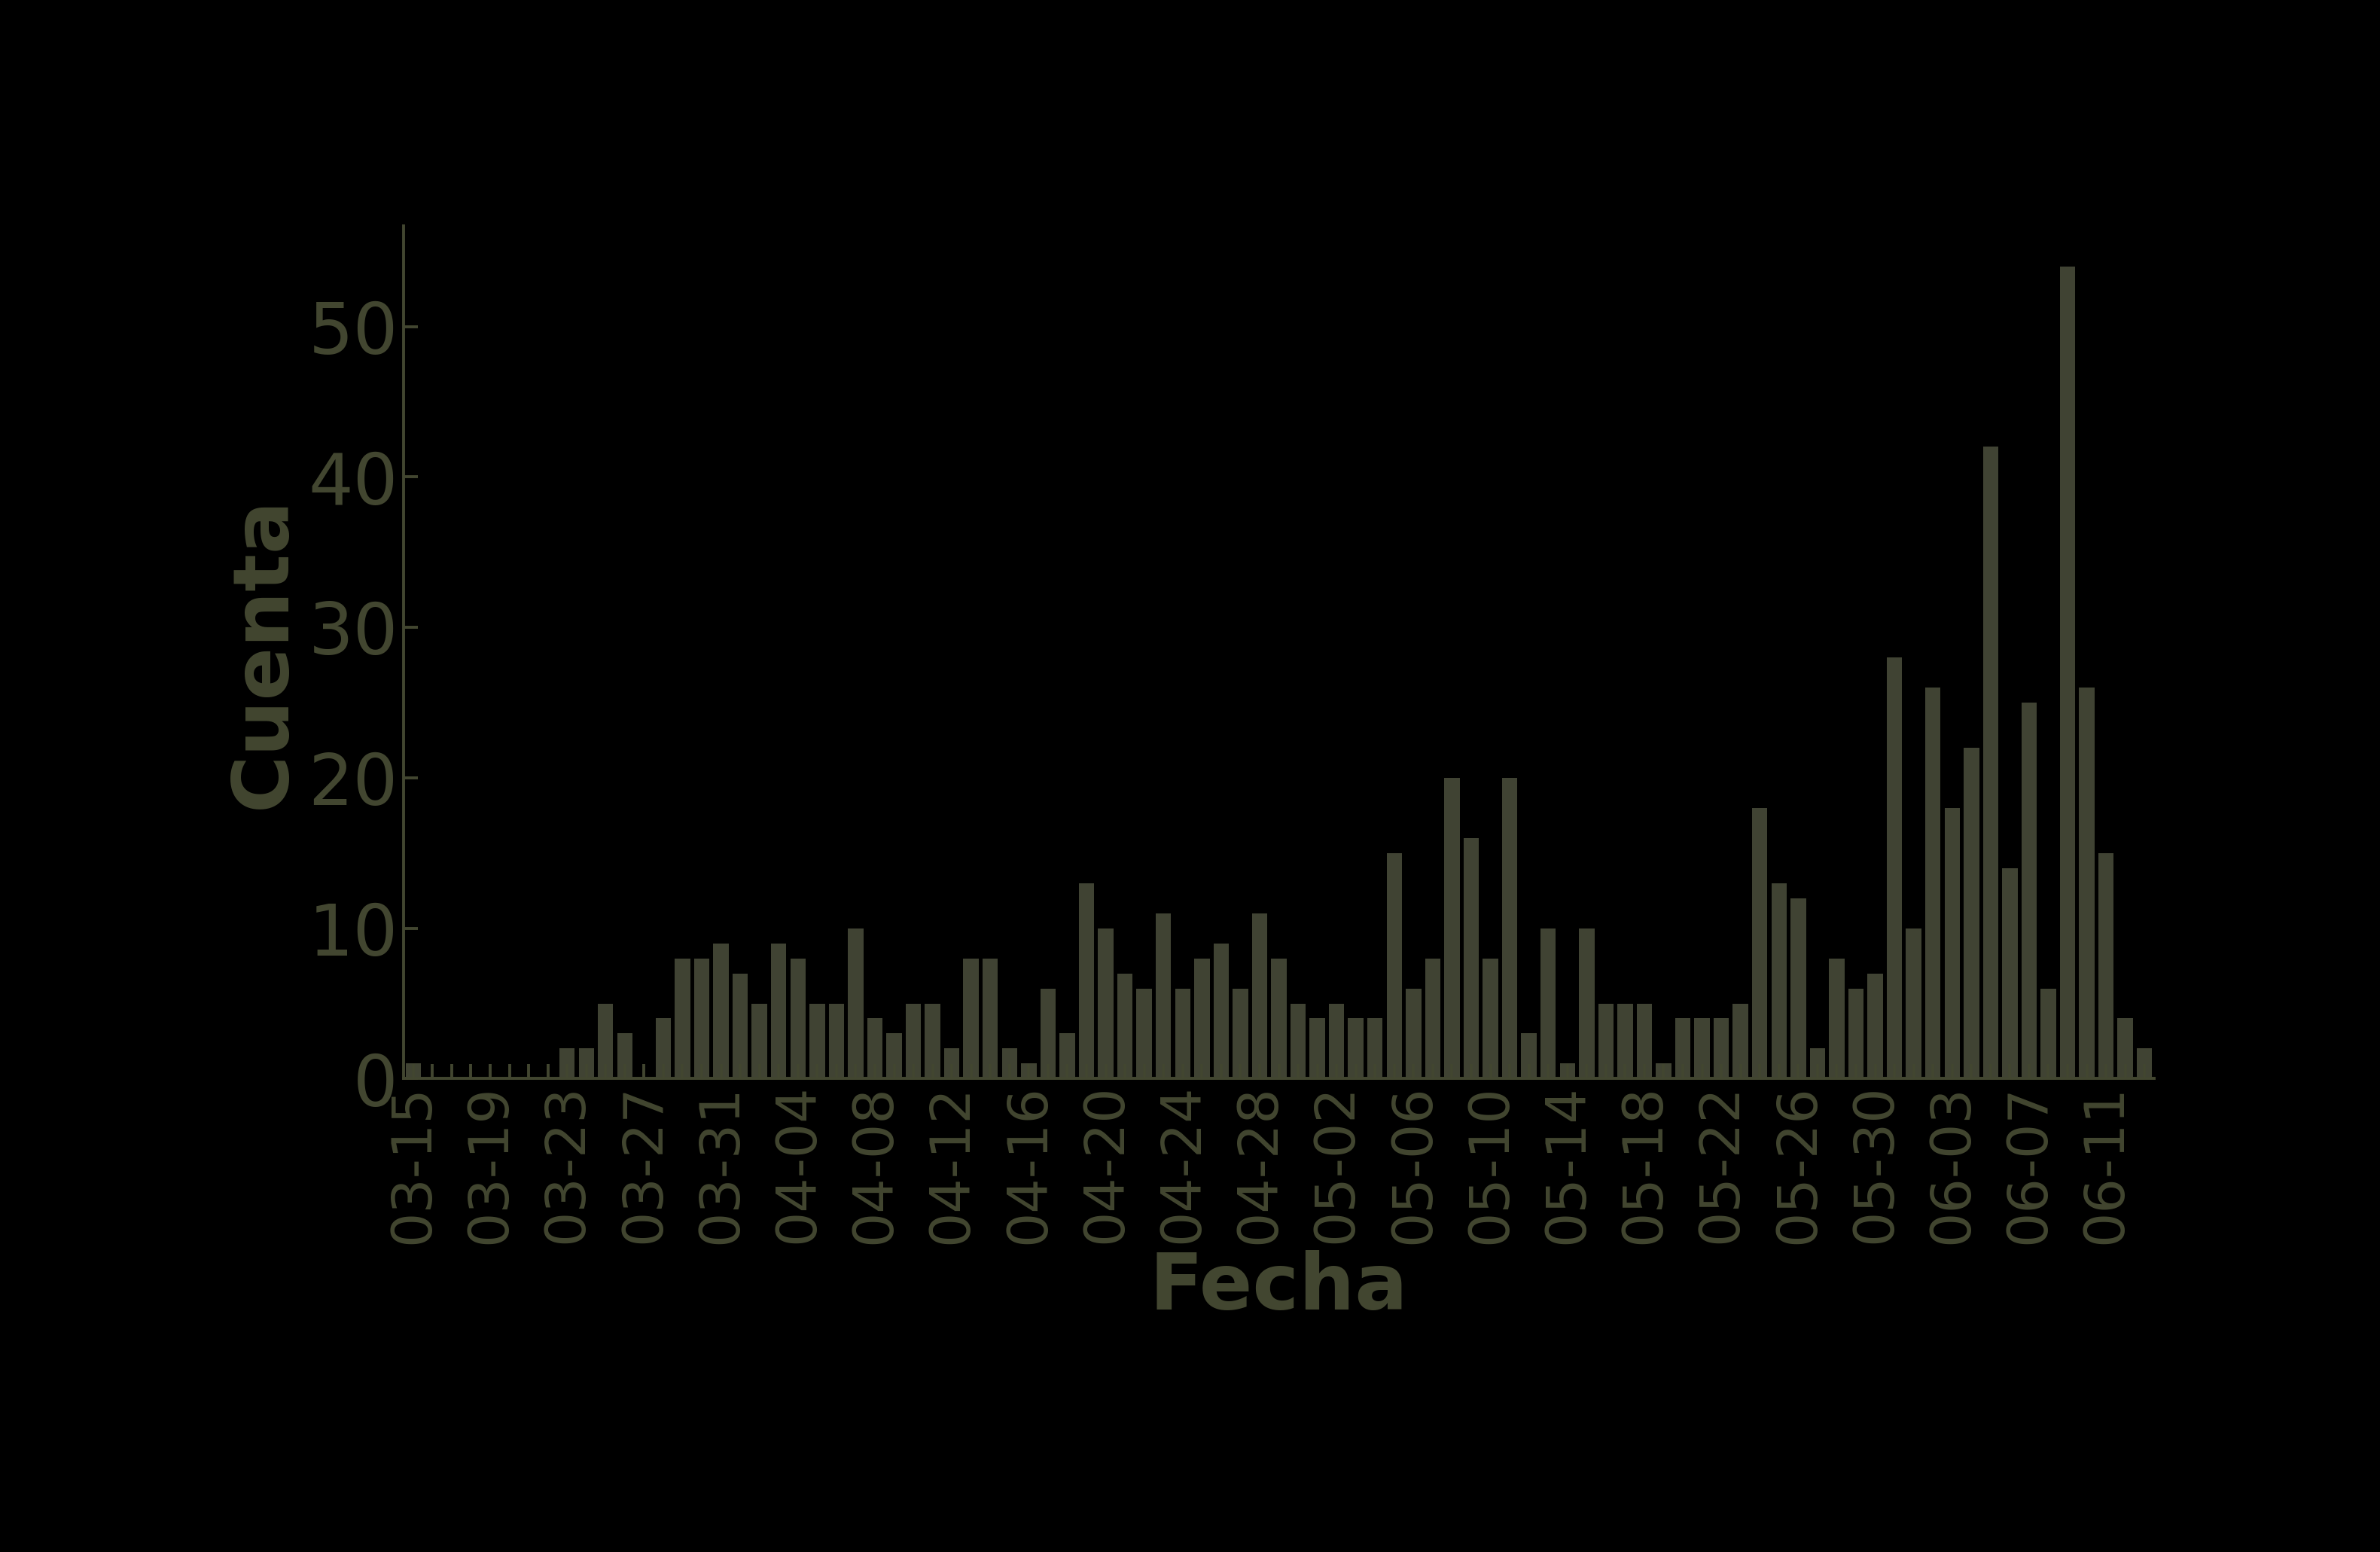

In [31]:
sns.set_context("talk")
cuenta_plot = cuenta_rec.reset_index(drop=True)
plt.figure(figsize=(20,10))
ax = sns.barplot(x="fecha", y="cuenta", data=cuenta_plot, color=color)
plt.xticks(rotation=90, fontsize=25)
plt.yticks(fontsize=25)
ax.tick_params(axis='x',which = "major", colors=color, labelsize=35, labelrotation=90)
ax.tick_params(axis='y', colors=color, labelsize=45)
plt.setp(ax.spines.values(), color=color)

ax.set_xlabel("Fecha", fontsize=50, color=color)
ax.set_ylabel("Cuenta", fontsize=50, color=color)
for i,label in enumerate(ax.get_xticklabels()):
    if i%4 == 0:
        pass
    else:
        label.set_visible(False)
plt.savefig(f'recuperados_dia.png',bbox_inches='tight', transparent="True", pad_inches = 0)
plt.show()

In [32]:
df_ant[df_ant["estado"] == "FALLECIDO"]

,id_de_caso,Fecha de notificacion,c_digo_divipola,ciudad,departamento,atencion,edad,sexo,tipo,estado,...,fis,Fecha de diagnóstico,fecha_recuperado,fecha_reporte_web,tipo_recuperaci_n,codigo_departamento,codigo_pais,fecha_de_muerte,tiempo recuperacion,tiempo muerte
676,677,2020-03-28T00:00:00.000,5652,San Francisco,Antioquia,FALLECIDO,80,M,EN ESTUDIO,FALLECIDO,...,2020-03-22,2020-03-29,NaT,2020-03-29,NaN,5,NaN,2020-04-24,NaN,33.0
1513,1514,2020-04-03T00:00:00.000,5001,Medellín,Antioquia,FALLECIDO,91,F,RELACIONADO,FALLECIDO,...,2020-03-20,2020-04-06,NaT,2020-04-06,NaN,5,NaN,2020-04-03,NaN,14.0
3152,3153,2020-04-09T00:00:00.000,5001,Medellín,Antioquia,FALLECIDO,67,M,RELACIONADO,FALLECIDO,...,2020-04-01,2020-04-16,NaT,2020-04-16,NaN,5,NaN,2020-04-18,NaN,17.0
3292,3293,2020-04-16T00:00:00.000,5313,Granada,Antioquia,FALLECIDO,87,F,EN ESTUDIO,FALLECIDO,...,2020-04-06,2020-04-17,NaT,2020-04-17,NaN,5,NaN,2020-05-02,NaN,26.0
3634,3635,2020-04-16T00:00:00.000,5001,Medellín,Antioquia,FALLECIDO,74,M,RELACIONADO,FALLECIDO,...,2020-04-14,2020-04-19,NaT,2020-04-19,NaN,5,NaN,2020-04-27,NaN,13.0
3641,3642,2020-04-15T00:00:00.000,5088,Bello,Antioquia,FALLECIDO,88,F,RELACIONADO,FALLECIDO,...,2020-04-12,2020-04-19,NaT,2020-04-19,NaN,5,NaN,2020-04-18,NaN,6.0
14188,14229,2020-05-12T00:00:00.000,5001,Medellín,Antioquia,FALLECIDO,73,M,EN ESTUDIO,FALLECIDO,...,2020-04-24,2020-05-15,NaT,2020-05-15,NaN,5,NaN,2020-06-05,NaN,42.0
35999,36040,2020-06-03T00:00:00.000,5088,Bello,Antioquia,FALLECIDO,86,F,RELACIONADO,FALLECIDO,...,2020-05-30,2020-06-05,NaT,2020-06-05,NaN,5,NaN,2020-06-06,NaN,7.0


In [33]:
df_ant["estado"].value_counts()

LEVE            1431
ASINTOMÁTICO     394
MODERADO          41
GRAVE              9
FALLECIDO          8
N/A                1
Name: estado, dtype: int64

In [34]:
df_male = df_ant[df_ant["sexo"] == "M"]
df_female = df_ant[df_ant["sexo"] == "F"]

male_death = df_male[df_male["estado"]=="FALLECIDO"]
female_death = df_female[df_female["estado"]=="FALLECIDO"]

m_cont = df_male.groupby(pd.cut(df_male["edad"], np.arange(0, 100, 4)))["id_de_caso"].count().to_frame("Hombres")
f_cont = df_female.groupby(pd.cut(df_female["edad"], np.arange(0, 100, 4)))["id_de_caso"].count().to_frame("Mujeres")

piramide = m_cont.join(f_cont).reset_index()

piramide["Hombres"] = -piramide["Hombres"]

piramide.head()

,edad,Hombres,Mujeres
0,"(0, 4]",-13,12
1,"(4, 8]",-10,13
2,"(8, 12]",-15,20
3,"(12, 16]",-14,20
4,"(16, 20]",-61,41


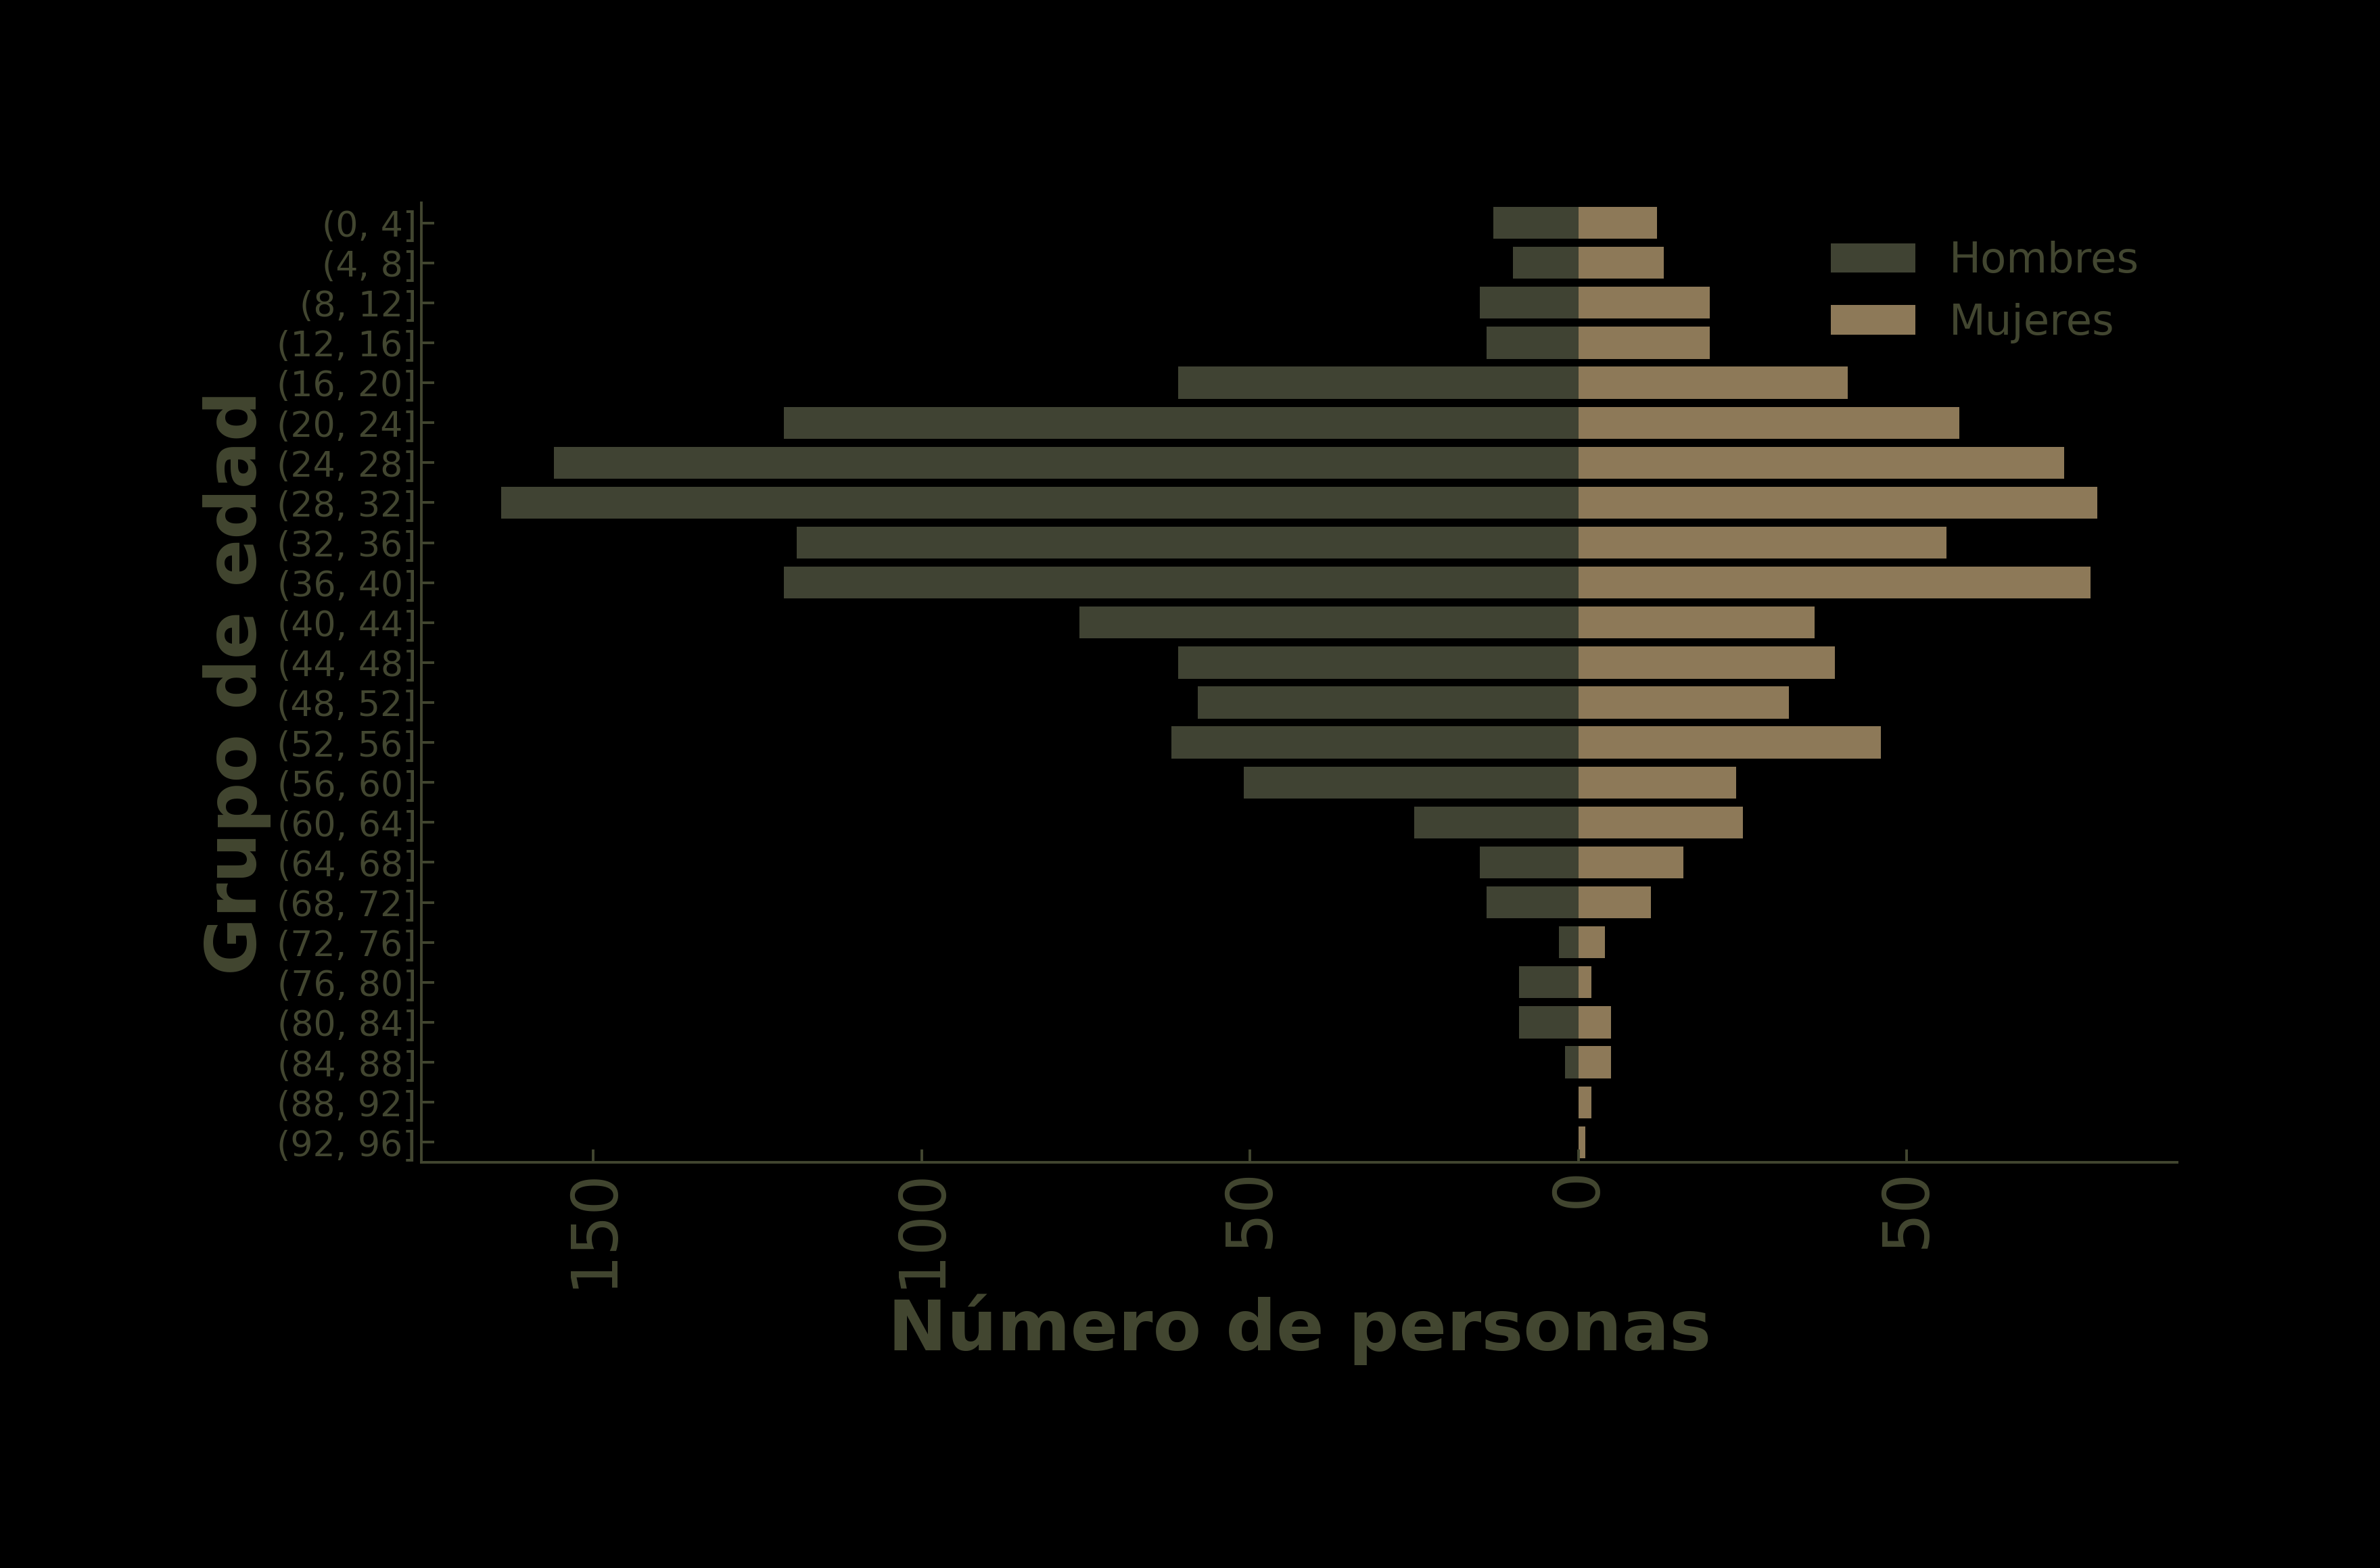

In [35]:
# sns.set_color_codes("pastel")
plt.figure(figsize=(20,12))
ax = sns.barplot(x="Hombres",y="edad", color=color, label="Hombres",data = piramide)

ax = sns.barplot(x="Mujeres",y="edad", color="#967B4F", label="Mujeres",data = piramide)

plt.setp(ax.spines.values(), color=color)


ax.tick_params(axis='x',which = "major", colors=color, labelsize=35, labelrotation=90)
ax.tick_params(axis='y', colors=color, labelsize=45)

ax.set_xlabel("Número de personas", fontsize=50, color=color)
ax.set_ylabel("Grupo de edad", fontsize=50, color=color)


plt.xticks(fontsize=45)
plt.yticks(fontsize=25)

ax.set_xticklabels(np.abs(list(ax.get_xticks())).astype(int))
plt.legend(framealpha=0.0, fontsize=30)

plt.tight_layout()
plt.savefig(f'piramide.png',bbox_inches='tight', transparent="True", pad_inches = 0)

plt.show()

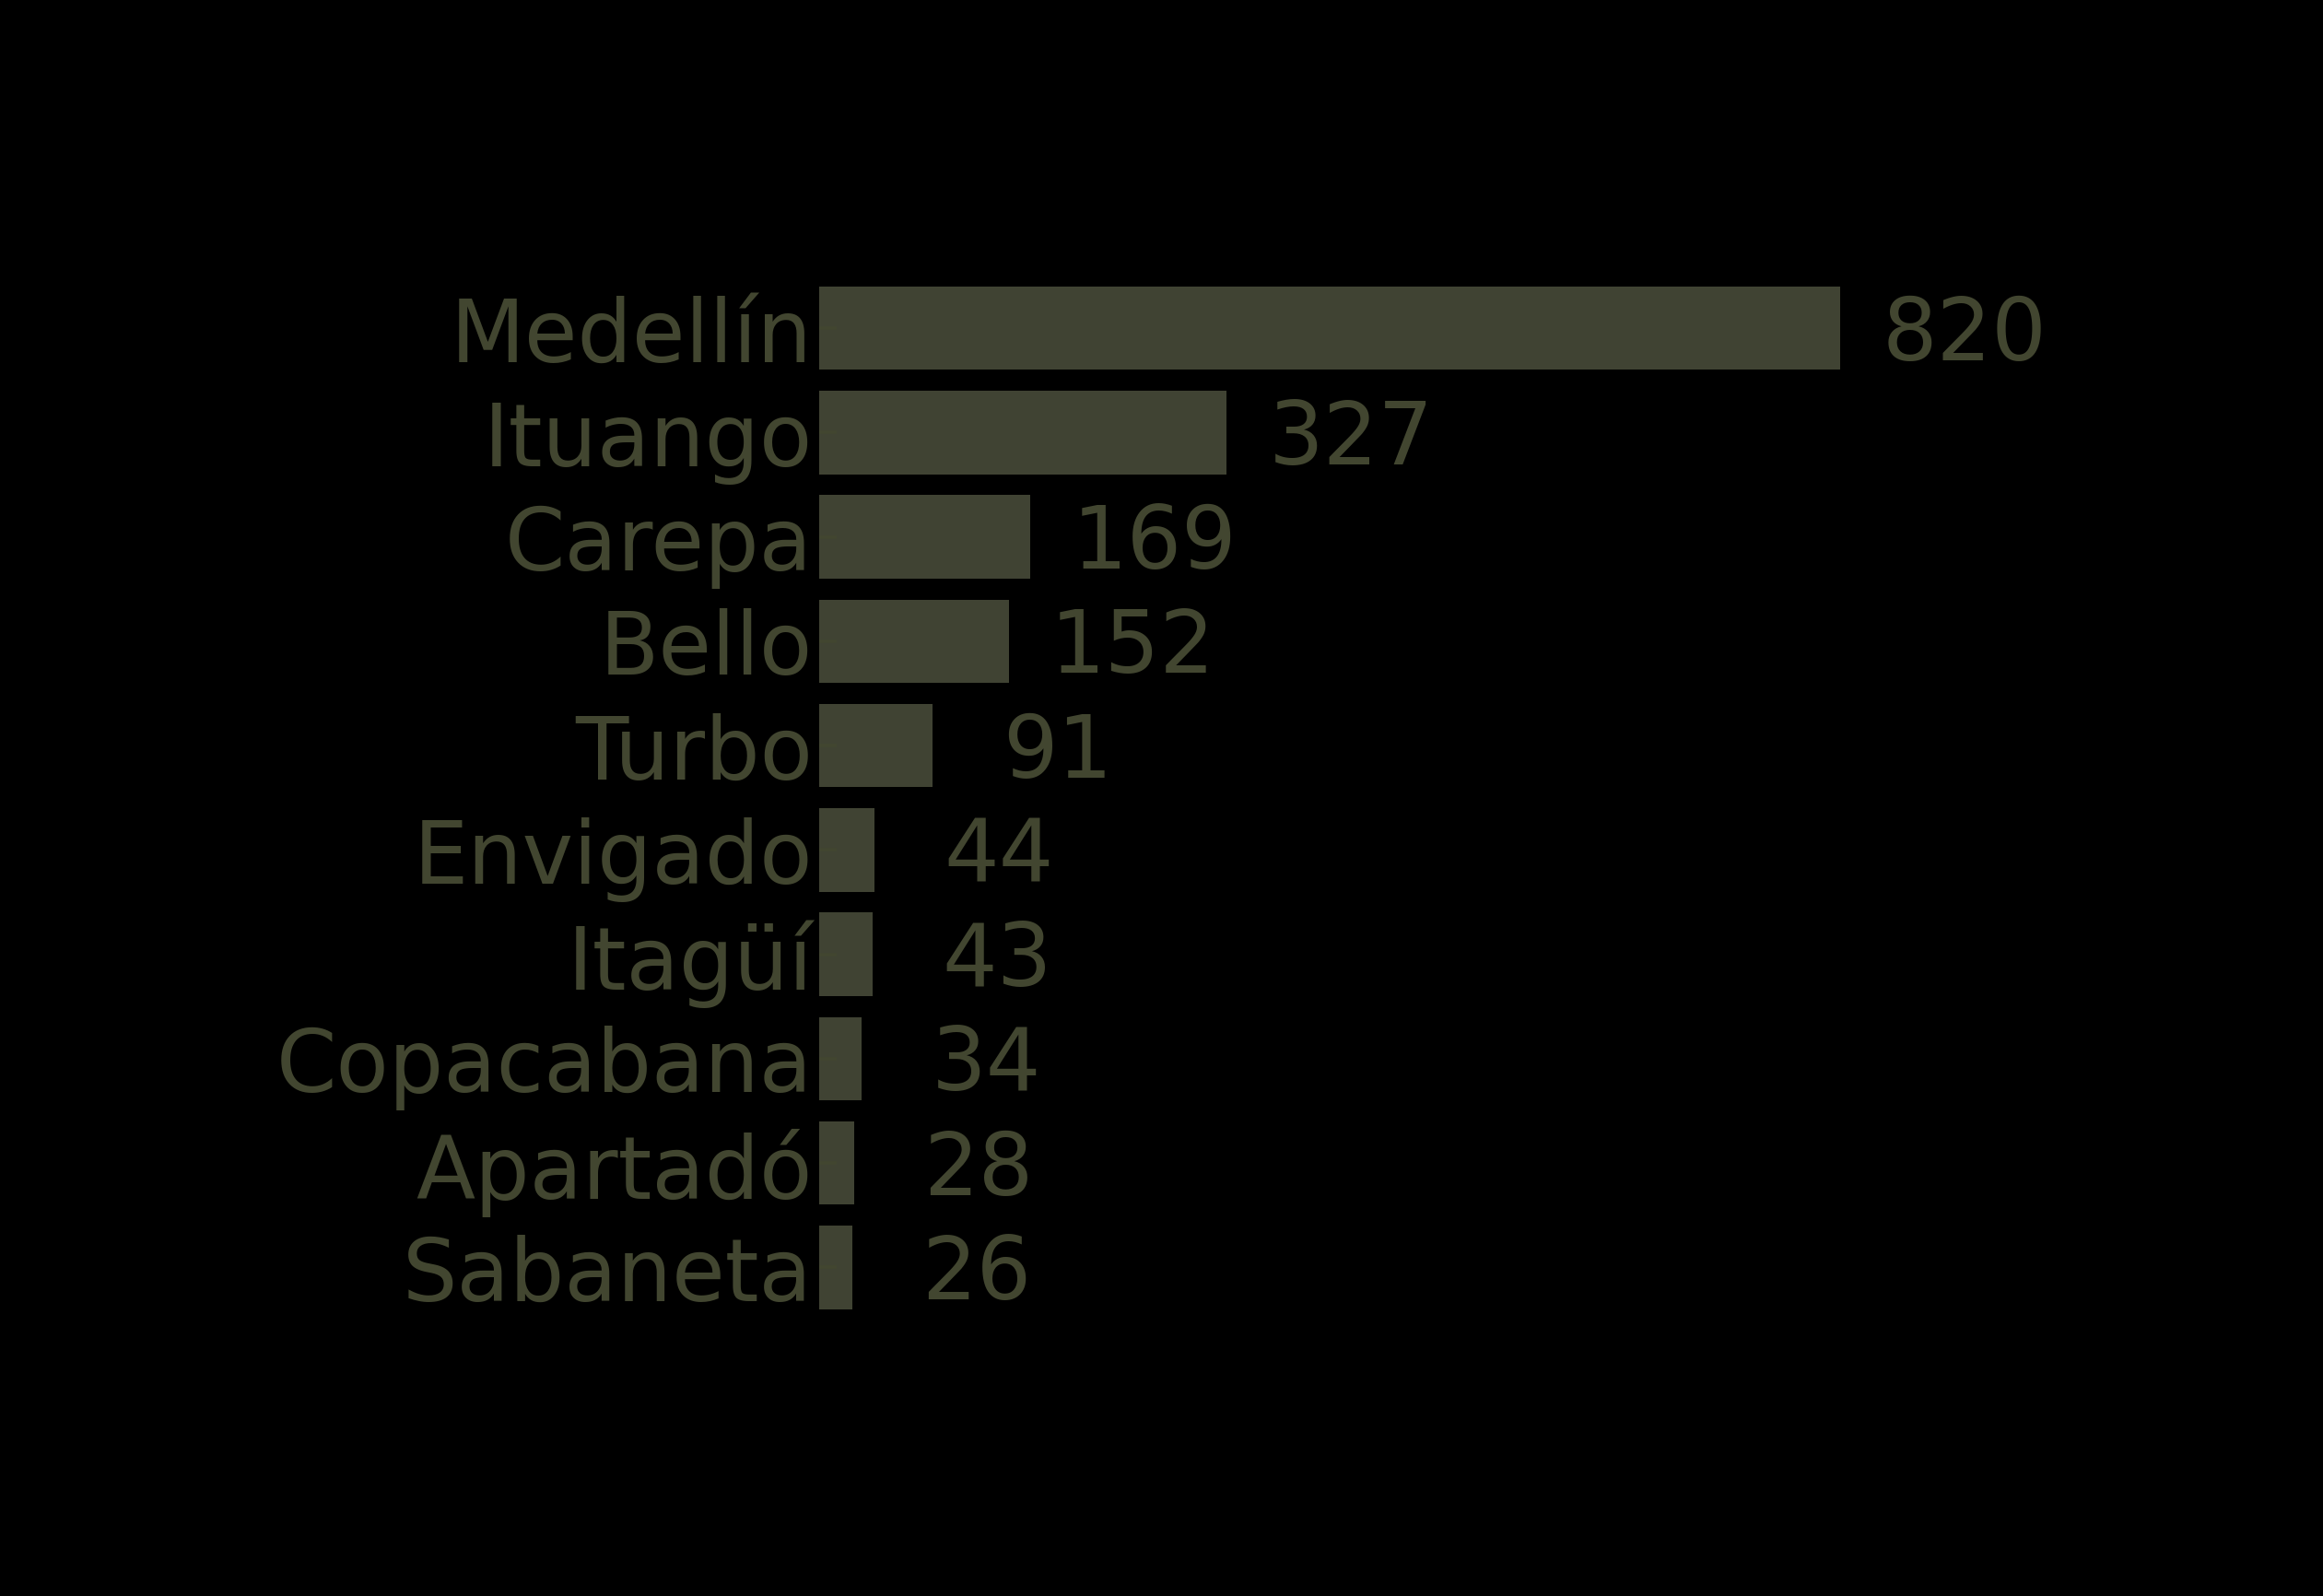

In [36]:
ciudades = df_ant.groupby("ciudad")["id_de_caso"].count().to_frame("cuenta").reset_index()
ciudades = ciudades.sort_values("cuenta", ascending=False).reset_index()
ax = sns.barplot(x = "cuenta", y="ciudad", data=ciudades.head(10), orient="h", color=color)

plt.grid(False)

ax.set_xlabel("", fontsize=30)
plt.xticks([])
plt.box(False)
ax.set_ylabel("", fontsize=30)

ax.tick_params(axis='y',which = "major", colors=color)



# jugar con estos valores
vertical_offset = 0.3
horizontal_offset = 100

ax.tick_params(axis='both', which='major', labelsize=45)
for index, row in ciudades.head(10).iterrows():
    ax.text(row["cuenta"] + horizontal_offset,index+vertical_offset, # posicion
            row["cuenta"], # texto
            color=color, 
            ha="center", 
            size=45)
    
plt.savefig(f'ciudades_antioquia.png',bbox_inches='tight', transparent="True", pad_inches = 0)
plt.show()

# ratio muertes-contagio

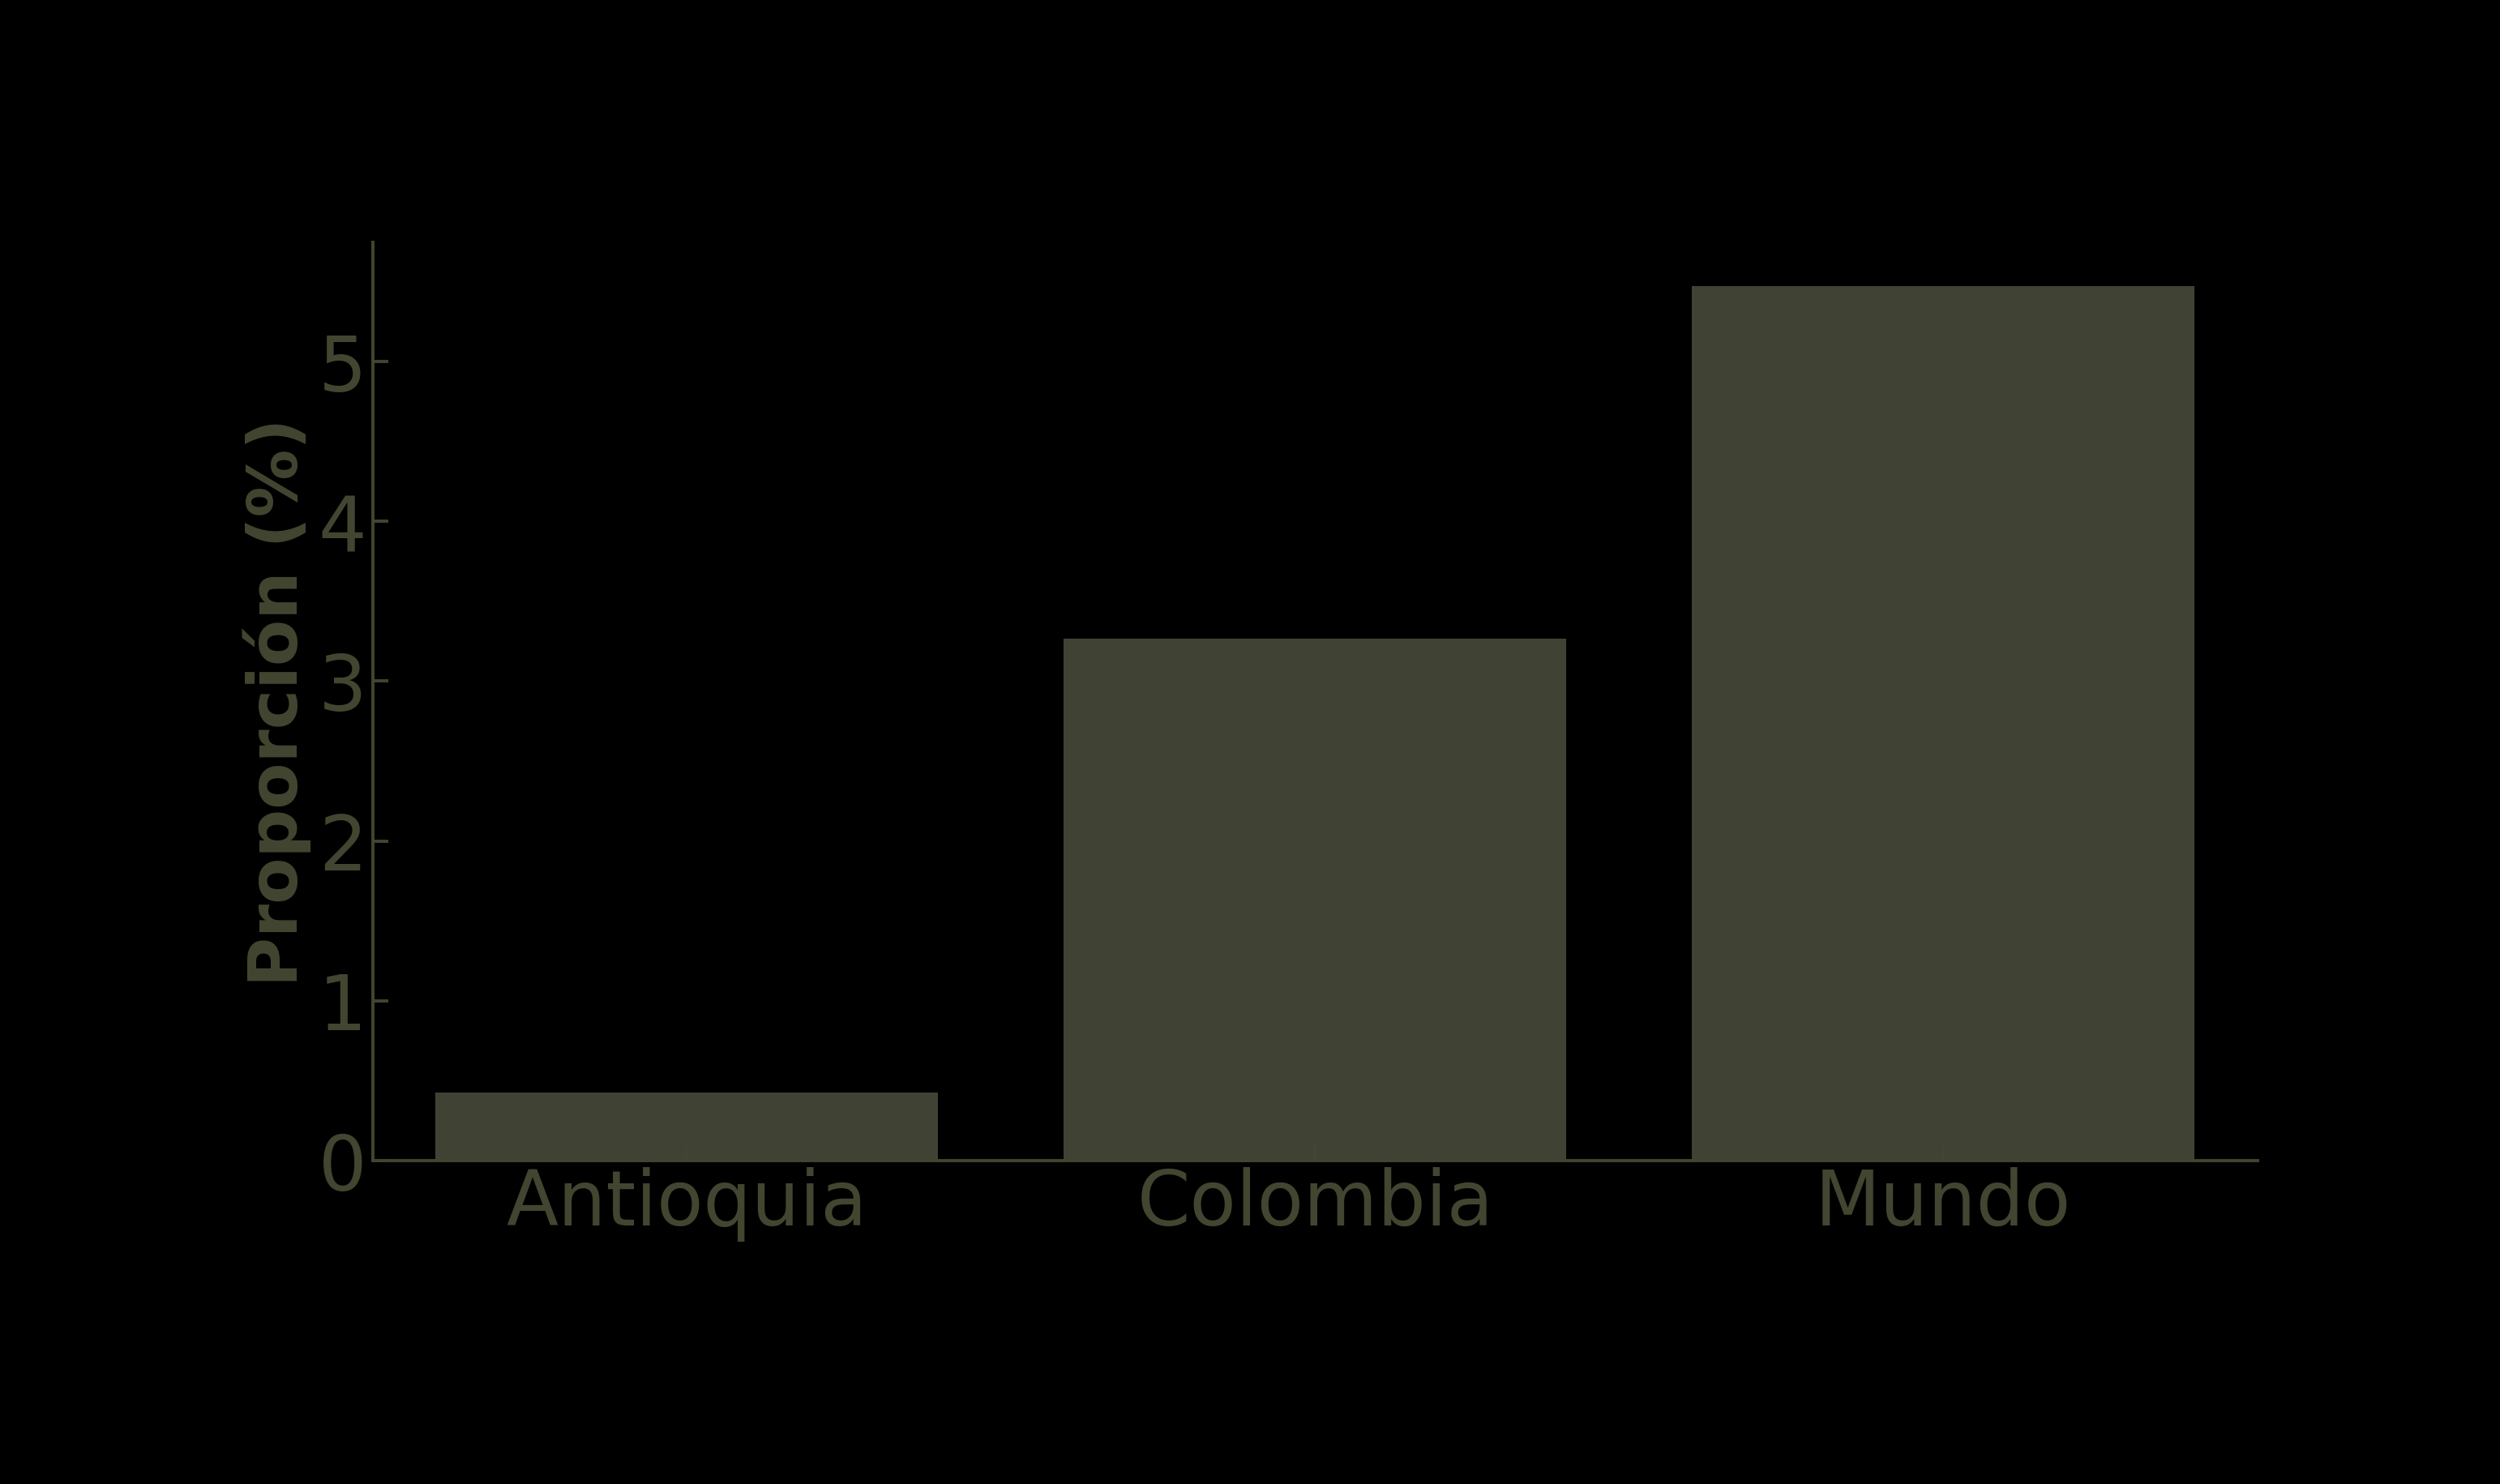

In [45]:
x = ["Antioquia", "Colombia", "Mundo"]
ant_rat = (8/1884) * 100
col_rat = (1592/48746) * 100
world_rat = (433183/7915976) * 100
y = [ant_rat,col_rat,world_rat]
plt.figure(figsize=(20,10))
ax = sns.barplot(x = x, y=y, color=color)

ax.tick_params(axis='x',which = "major", colors=color, labelsize=45)
ax.tick_params(axis='y', colors=color, labelsize=45)
plt.setp(ax.spines.values(), color=color)

ax.set_xlabel("", fontsize=50, color=color)
ax.set_ylabel("Proporción (%)", fontsize=40, color=color)

plt.savefig(f'ratios.png',bbox_inches='tight', transparent="True", pad_inches = 0)
plt.show()

In [38]:
capacidad = 624

In [39]:
uci

9

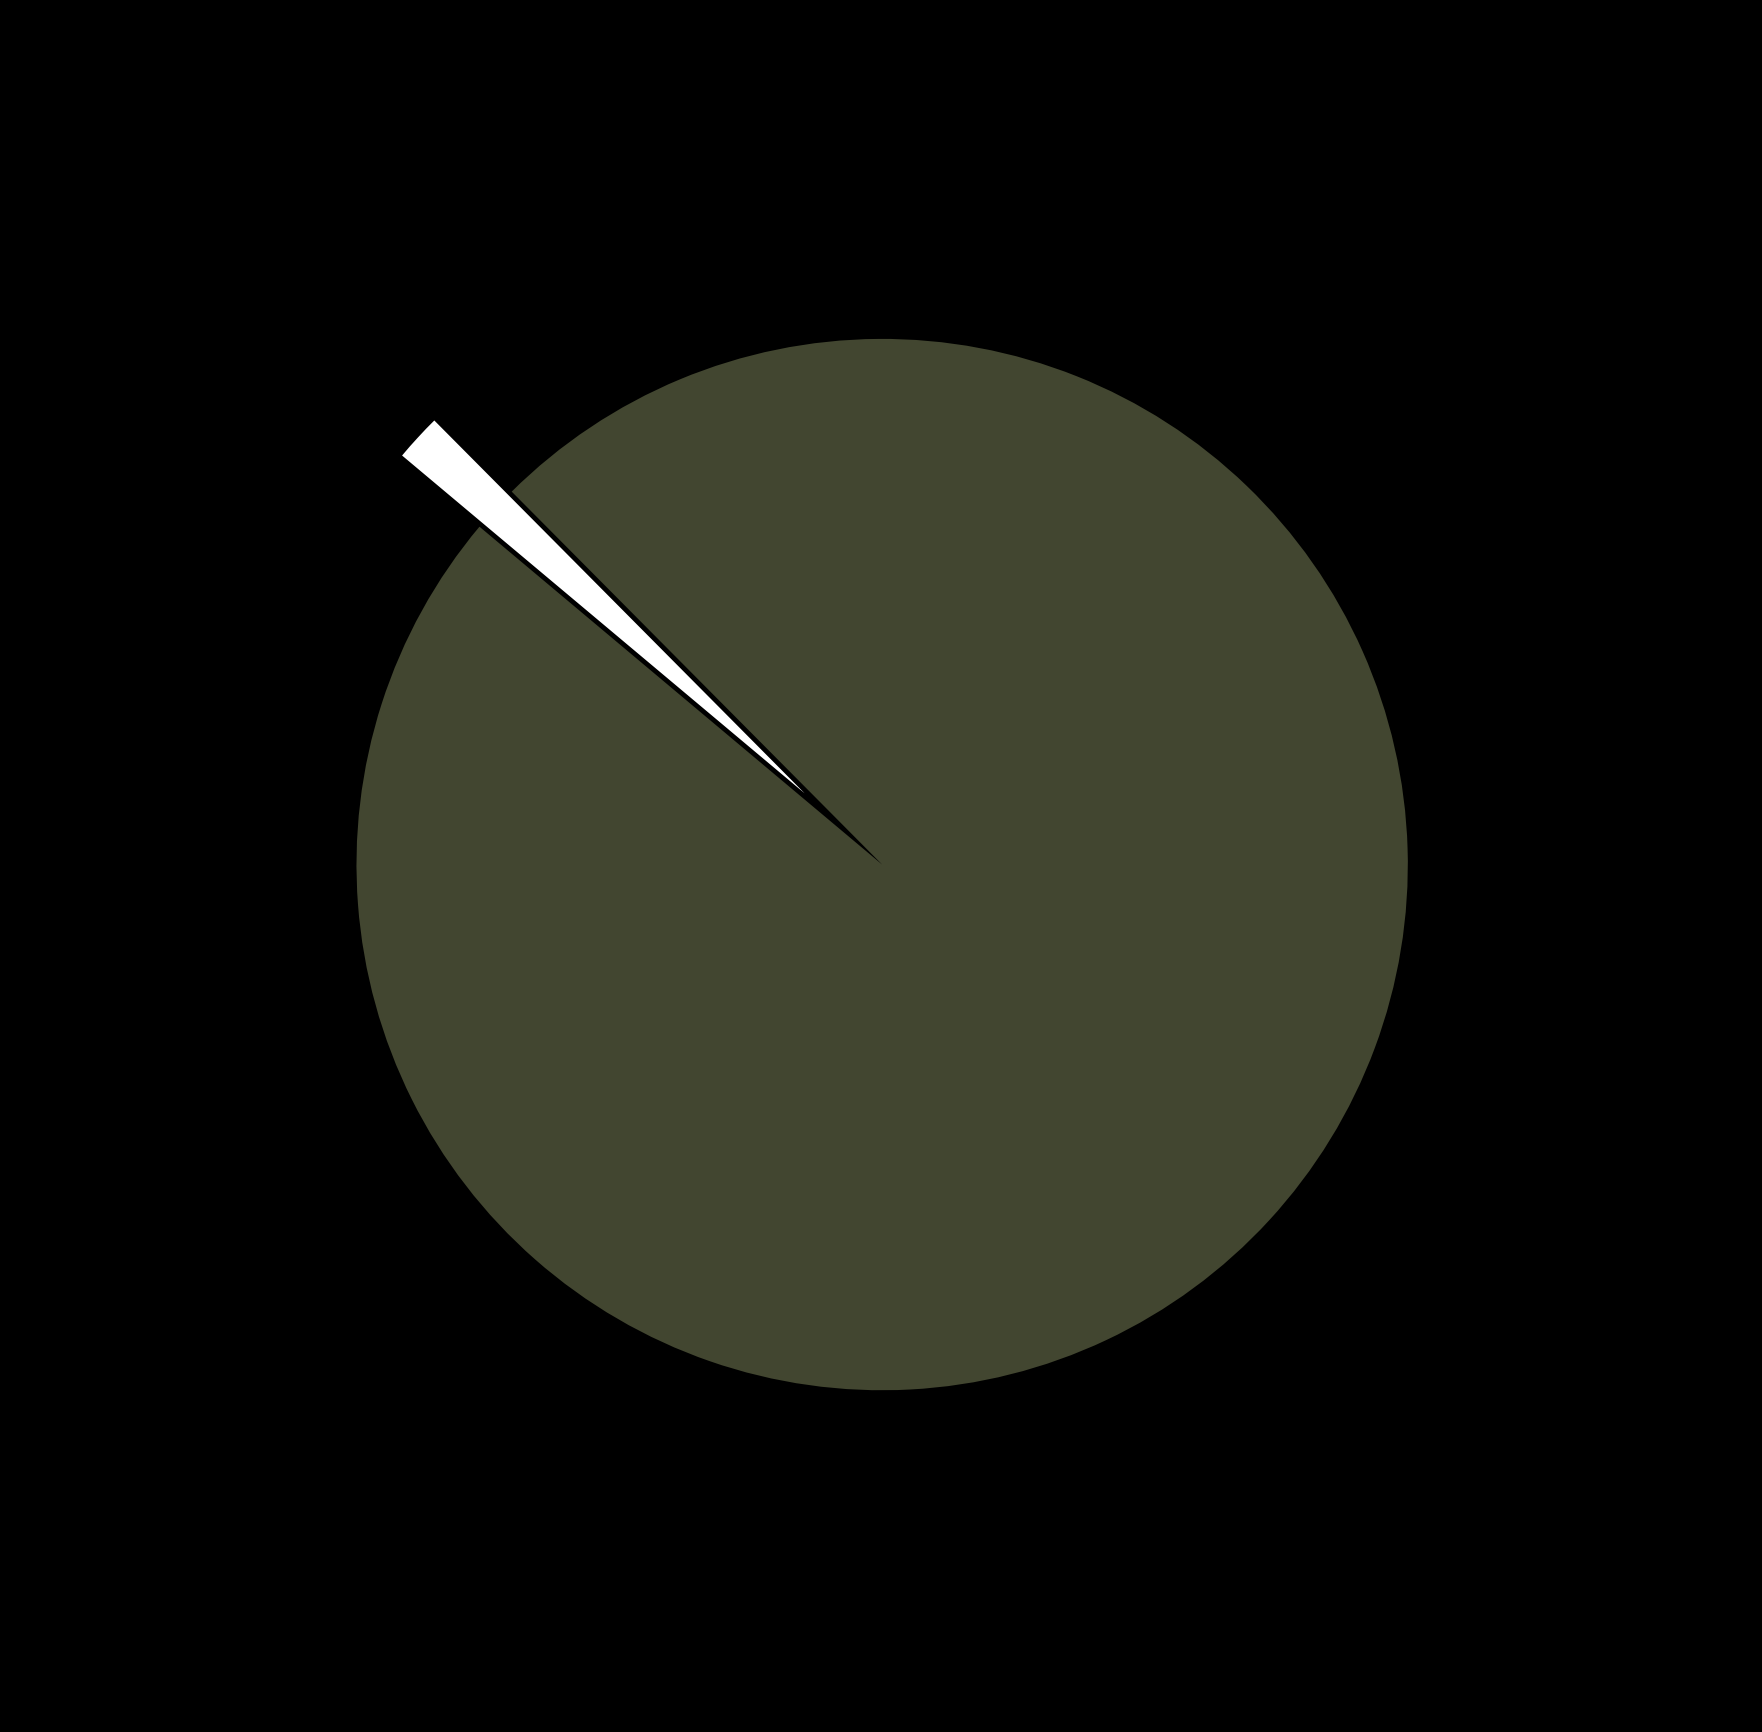

In [40]:
import matplotlib.pyplot as plt

# Data to plot
labels = '', ''
sizes = [624-uci, uci]
colors = [color, "white"]
explode = (0, 0.2)  # explode 1st slice

# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors, startangle=140)

plt.axis('equal')

plt.savefig(f'instalada.png',bbox_inches='tight', transparent="True", pad_inches = 0)

plt.show()



In [41]:
367+296+6+4+4

677

In [42]:
df_ant["atencion"].value_counts()

CASA            1059
RECUPERADO       765
HOSPITAL          41
HOSPITAL UCI       9
FALLECIDO          8
N/A                2
Name: atencion, dtype: int64

In [43]:
df_ant["estado"].value_counts()

LEVE            1431
ASINTOMÁTICO     394
MODERADO          41
GRAVE              9
FALLECIDO          8
N/A                1
Name: estado, dtype: int64

In [44]:
df_ant

,id_de_caso,Fecha de notificacion,c_digo_divipola,ciudad,departamento,atencion,edad,sexo,tipo,estado,...,fis,Fecha de diagnóstico,fecha_recuperado,fecha_reporte_web,tipo_recuperaci_n,codigo_departamento,codigo_pais,fecha_de_muerte,tiempo recuperacion,tiempo muerte
2,3,2020-03-07T00:00:00.000,5001,Medellín,Antioquia,RECUPERADO,50,F,IMPORTADO,LEVE,...,2020-02-29,2020-03-09,2020-03-15,2020-03-09,PCR,5,724,NaT,15.0,NaN
3,4,2020-03-09T00:00:00.000,5001,Medellín,Antioquia,RECUPERADO,55,M,RELACIONADO,LEVE,...,2020-03-06,2020-03-11,2020-03-26,2020-03-11,PCR,5,NaN,NaT,20.0,NaN
4,5,2020-03-09T00:00:00.000,5001,Medellín,Antioquia,RECUPERADO,25,M,RELACIONADO,LEVE,...,2020-03-08,2020-03-11,2020-03-23,2020-03-11,PCR,5,NaN,NaT,15.0,NaN
5,6,2020-03-10T00:00:00.000,5360,Itagüí,Antioquia,RECUPERADO,27,F,RELACIONADO,LEVE,...,2020-03-06,2020-03-11,2020-03-26,2020-03-11,PCR,5,NaN,NaT,20.0,NaN
19,20,2020-03-11T00:00:00.000,5001,Medellín,Antioquia,RECUPERADO,26,F,RELACIONADO,LEVE,...,2020-03-09,2020-03-14,2020-03-24,2020-03-14,PCR,5,NaN,NaT,15.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48048,48089,2020-06-09T00:00:00.000,5147,Carepa,Antioquia,CASA,31,M,EN ESTUDIO,LEVE,...,2020-06-09,2020-06-12,NaT,2020-06-13,NaN,5,NaN,NaT,NaN,NaN
48049,48090,2020-06-08T00:00:00.000,5147,Carepa,Antioquia,CASA,23,M,EN ESTUDIO,ASINTOMÁTICO,...,NaT,2020-06-12,NaT,2020-06-13,NaN,5,NaN,NaT,NaN,NaN
48050,48091,2020-06-09T00:00:00.000,5147,Carepa,Antioquia,CASA,21,M,EN ESTUDIO,LEVE,...,2020-06-09,2020-06-12,NaT,2020-06-13,NaN,5,NaN,NaT,NaN,NaN
48051,48092,2020-06-09T00:00:00.000,5615,Rionegro,Antioquia,CASA,32,M,EN ESTUDIO,LEVE,...,2020-06-08,2020-06-12,NaT,2020-06-13,NaN,5,NaN,NaT,NaN,NaN
